https://medium.com/geekculture/applying-7-classification-algorithms-on-the-titanic-dataset-278ef222b53c#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjE3MjdiNmI0OTQwMmI5Y2Y5NWJlNGU4ZmQzOGFhN2U3YzExNjQ0YjEiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NjA2OTkzMzEsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExNDU3OTc4MDkzMjIwMjM4ODUxNyIsImVtYWlsIjoianVuZzY2NjU5N0BnbWFpbC5jb20iLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6IuygleywrCIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BSXRidm1sSTZSYUNLa0JhNE90cjlXdFd4cmZIajBNRWx1TVBLTjFSdlVSYz1zOTYtYyIsImdpdmVuX25hbWUiOiLsoJXssKwiLCJpYXQiOjE2NjA2OTk2MzEsImV4cCI6MTY2MDcwMzIzMSwianRpIjoiZTYzMGJlMWE2ODBjYjZmMmRlYjY3ZmNlZGY1ZTg1ZmM0YWY0NmZhMiJ9.gDgQiMDvr_mFykypEOV2TBwMKvI72P5QrWqmDz7HgkISRzi_ditfpuraZuUMd3-t2V1QtKpJ7pD16zQ44RPdiwXZ6v2yGegLqYYfYbdnf-KdacqbNoB_Ize2H0aHxT6CxzE99RgfSVOzKozzp3MfZAhESGCbZnM34cUQybuSXAmADVJ9WgDXqc_UX8FcoQcvOaqP8A3fIKiadqBxWTIwmqpp5IrybcwssM3A7b6EctOqZrZFiLGXk_Pk0htRqS3-_Yw1Q-AjzGmRdSjnt5palCC8kfLIm7gb2tckunts-BLABw40aLiXli2gSlFRi6bSZZogeP-62atqu0dUgv7oJw
https://eshitagoel.medium.com/eda-on-titanic-machine-learning-from-disaster-6b518bb97e17

- 이상치 제거
- train-test split
- 데이터 핸들링
- one-hot 인코딩
- 간단한 

In [657]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('../data/titanic/train.csv')
train.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [658]:
test = pd.read_csv('../data/titanic/test.csv')
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

<AxesSubplot:>

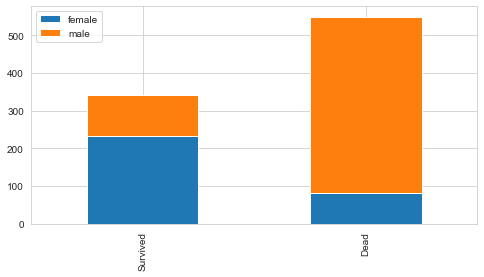

In [659]:
survived = train[train["Survived"]==1]["Sex"].value_counts()
dead = train[train["Survived"]==0]["Sex"].value_counts()
df_sex = pd.DataFrame([survived,dead])
df_sex.index = ["Survived","Dead"]
df_sex.plot(kind="bar",stacked = True, figsize = (8,4))

In [660]:
combined_data = [train,test]

for data in combined_data:
    data["Prefix"] = data["Name"].str.extract(' ([A-Za-z]+)\.', expand = False)

In [661]:
Prefix_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":0,"Dr":3,"Rev":3,
                  "Major":3,"Mlle":1,"Col":3,"Capt":0,"Sir":0,"Ms":1,
                  "Lady":1,"Mme":3,"Countess":3,"Jonkheer":3,"Don":3}
for data in combined_data:
    data["Prefix"] = data["Prefix"].map(Prefix_mapping)

<AxesSubplot:>

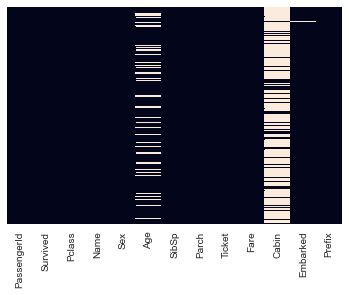

In [662]:
import seaborn as sns

sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [663]:
train["Cabin"].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

## Cabin 전처리

- cabin 있는지 여부
- cabin 위치 인코딩

In [664]:
combined_data = [train,test]

In [665]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [666]:
for data in combined_data:
    data["Cabin"] = data["Cabin"].str.extract('([A-Za-z]+)', expand = False)
    
train.Cabin.head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

In [667]:
# for data in combined_data:
#     data["Cabin_order"] = data["Cabin"].str.extract(' ([A-Za-z]+)\.', expand = False)
    
# Cabin_mapping = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}
# for data in combined_data:
#     data["Cabin_order"] = data["Cabin_order"].map(Cabin_mapping)

In [668]:

# Cabin 없는 사람 0 처리

#train["Cabin"] = train["Cabin"].fillna(0)

# for i in range(891):
#     if(train.at[i,"Cabin"]!=0):
# #         if (train.at[i,"Cabin"]=1):

# # A ~ G 객실별 ordinal encoding
# for data in combined_data:
#     data["Cabin_order"] = data["Cabin"].str.extract(' ([A-Za-z]+)\.', expand = False)
    


In [669]:
cabin_rate = train.groupby(['Cabin','Survived']).count()
    # Title로 사망자 집계
    # 0: 사망
    # 1: 생존
cabin_rate

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Cabin Survived                                                              
A     0                   8       8     8    8    5      8      8       8   
      1                   7       7     7    7    7      7      7       7   
B     0                  12      12    12   12   11     12     12      12   
      1                  35      35    35   35   34     35     35      35   
C     0                  24      24    24   24   21     24     24      24   
      1                  35      35    35   35   30     35     35      35   
D     0                   8       8     8    8    8      8      8       8   
      1                  25      25    25   25   23     25     25      25   
E     0                   8       8     8    8    8      8      8       8   
      1                  24      24    24   24   22     24     24      24   
F     0                   5       5     5    5    4      5      5       5   
      1                   8       8     8    8    7      8      8       8   
G     0                   2       2     2    2    2      2      2       2   
      1                   2       2     2    2    2      2      2       2   
T     0                   1       1     1    1    1      1      1       1   

                Fare  Embarked  Prefix  
Cabin Survived                          
A     0            8         8       8  
      1            7         7       7  
B     0           12        12      12  
      1           35        33      35  
C     0           24        24      24  
      1           35        35      35  
D     0            8         8       8  
      1           25        25      25  
E     0            8         8       8  
      1           24        24      24  
F     0            5         5       5  
      1            8         8       8  
G     0            2         2       2  
      1            2         2       2  
T     0            1         1       1

In [670]:
    # Cabin별 생존자
cabin_count = pd.DataFrame(cabin_rate.Prefix)
cabin_count = cabin_count.reset_index()
cabin_count = cabin_count.groupby(['Survived','Cabin']).sum()
cabin_count = cabin_count.reset_index()

In [671]:
cabin_count_set = set(cabin_count['Cabin'])
cabin_count_list = list(cabin_count_set)
len(cabin_count_list)

8

In [672]:
cabin_count = cabin_count.reset_index()

In [673]:
cabin_count

index  Survived Cabin  Prefix
0       0         0     A       8
1       1         0     B      12
2       2         0     C      24
3       3         0     D       8
4       4         0     E       8
5       5         0     F       5
6       6         0     G       2
7       7         0     T       1
8       8         1     A       7
9       9         1     B      35
10     10         1     C      35
11     11         1     D      25
12     12         1     E      24
13     13         1     F       8
14     14         1     G       2

In [674]:
# pclass등급별 가장 많이 있는 객실cabin 알아보기
num_list= list(range(1,4))
cab_list = []


for n in range(1,4):
    nan_df = pd.DataFrame(train[train["Pclass"] == n]["Cabin"].value_counts()).reset_index()
    nan_df["Cab_type"] = nan_df["index"]
    nan = nan_df.Cabin.max()
    nan_cab = nan_df[nan_df["Cabin"]== nan]["Cab_type"]
    cab_list.append(nan_cab) 
cab_list= pd.DataFrame(cab_list).reset_index()
cab_list= cab_list.drop("index", 1)
cab_list["Cabin"] = cab_list[0]
cab_list = cab_list.drop(0,1)
cab_list["Pclass"] = [1,2,3]

cab_list

# pclass=1이 제일 많았던 곳은 C
# pclass=2,3이 제일 많았던 곳은 F

Cabin  Pclass
0     C       1
1     F       2
2     F       3

In [675]:
#일단 결측치를 N으로 처리
import numpy as np
train["Cabin"] = train.Cabin.replace(np.nan, 'N')

#결측치 N을 등급별 가장 많이 있던 Cabin으로 바꾸기

for n in range(0, len(train)):
    if train["Cabin"][n] == 'N':
        if train['Pclass'][n] == 1:
            train["Cabin"][n] = cab_list.Cabin[cab_list["Pclass"]==1].unique()[0]
        elif train['Pclass'][n] == 2:
            train['Cabin'][n] = cab_list.Cabin[cab_list["Pclass"]==2].unique()[0]
        else:
            train["Cabin"][n] = cab_list.Cabin[cab_list["Pclass"]==3].unique()[0]
    else:
        train['Cabin'][n] = train['Cabin'][n]

<ipython-input-675-514e0ca3cf45>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Cabin"][n] = cab_list.Cabin[cab_list["Pclass"]==3].unique()[0]
<ipython-input-675-514e0ca3cf45>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Cabin'][n] = train['Cabin'][n]
<ipython-input-675-514e0ca3cf45>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Cabin"][n] = cab_list.Cabin[cab_list["Pclass"]==3].unique()[0]
<ipython-inp

In [676]:
train['Cabin'].value_counts()

F    660
C     99
B     47
D     33
E     32
A     15
G      4
T      1
Name: Cabin, dtype: int64

In [677]:
# Cabin_mapping = {"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6,"T":7}

# for data in combined_data:
#     data["Cabin"] = data["Cabin"].map(Cabin_mapping)
            


- cabin == nan 인 경우 


In [ ]:
test["Cabin"] = pd.to_numeric(test["Cabin"], downcast="integer")

# train["Cabin_order"] = train["Cabin_order"].astype(int)
# test["Cabin_order"] = test["Cabin_order"].astype(int)


In [678]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Prefix       417 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

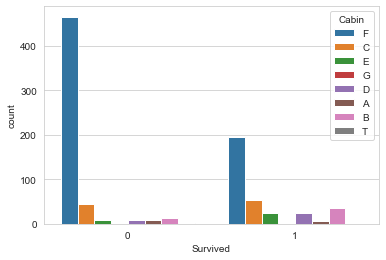

In [679]:
sns.countplot(x = "Survived", hue = "Cabin", data= train)

<AxesSubplot:>

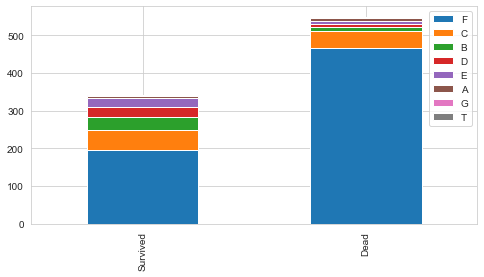

In [680]:
survived = train[train["Survived"]==1]["Cabin"].value_counts()
dead = train[train["Survived"]==0]["Cabin"].value_counts()
df_cabin = pd.DataFrame([survived,dead])
df_cabin.index = ["Survived","Dead"]
df_cabin.plot(kind="bar",stacked = True, figsize = (8,4))

<AxesSubplot:xlabel='Survived', ylabel='count'>

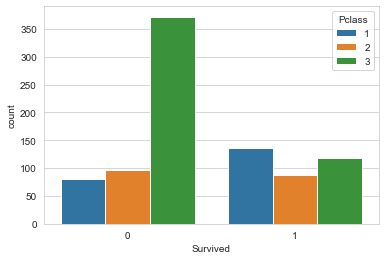

In [681]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Pclass", data = train)

<AxesSubplot:>

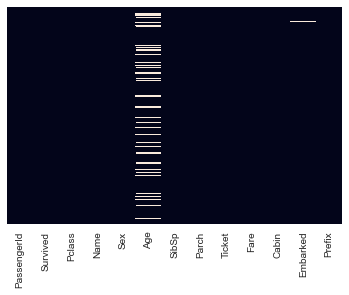

In [682]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

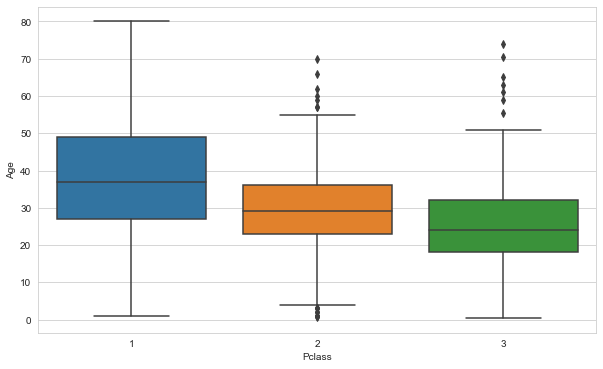

In [683]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Pclass",y="Age",data=train)

In [684]:
# train["Age"] = pd.to_numeric(train["Age"], downcast="integer")
# test["Age"] = pd.to_numeric(test["Age"], downcast="integer")

############
#train["Age"] = train["Age"].astype(int)
#test["Age"] = test["Age"].astype(int)



In [685]:
train.groupby(['Prefix'])['Age'].agg(['mean', 'median'])

mean  median
Prefix                   
0       30.197638    28.0
1       22.020000    21.5
2       35.898148    35.0
3       42.950000    44.5

In [686]:
#Mr, Mrs, Miss별 나이의 중앙값을 나이의 결측치에 넣기

train["Age"].fillna(train.groupby("Prefix")["Age"].transform("median"), inplace=True)
train.groupby("Prefix")["Age"].transform("median")

0      28.0
1      35.0
2      21.5
3      35.0
4      28.0
       ... 
886    44.5
887    21.5
888    21.5
889    28.0
890    28.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

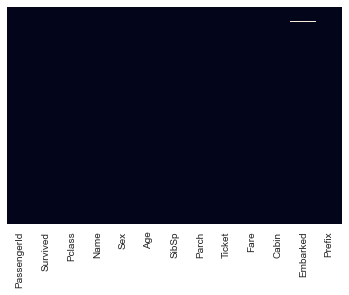

In [687]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

- age를 pclass별로 묶을 수도 있음!

In [688]:
# avg_first = train["Age"][train["Pclass"]==1].mean()
# avg_second = train["Age"][train["Pclass"]==2].mean()
# avg_third = train["Age"][train["Pclass"]==3].mean()
# for data in combined_data:
#     data["Age"] = data["Age"].fillna(0)
    
# for i in range(891):
#     if(train.at[i,"Age"]==0):
#         if(train.at[i,"Pclass"]==1):
#             train.at[i,"Age"]=avg_first
#         elif(train.at[i,"Pclass"]==2):
#             train.at[i,"Age"]=avg_second
#         else:
#             train.at[i,"Age"]=avg_third
# for i in range(418):
#     if(test.at[i,"Age"]==0):
#         if(test.at[i,"Pclass"]==1):
#             test.at[i,"Age"]=avg_first
#         elif(test.at[i,"Pclass"]==2):
#             test.at[i,"Age"]=avg_second
#         else:
#             test.at[i,"Age"]=avg_third

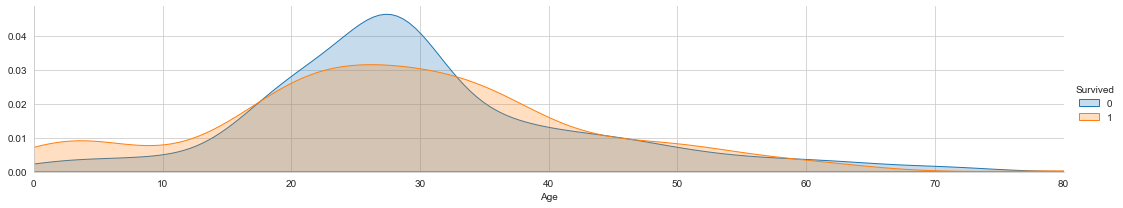

In [689]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()

<AxesSubplot:>

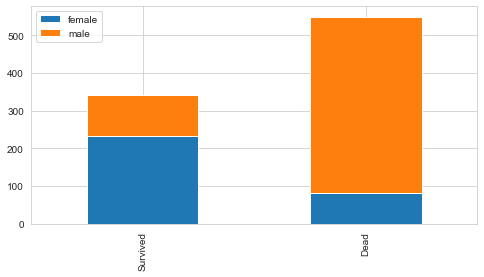

In [690]:
survived = train[train["Survived"]==1]["Sex"].value_counts()
dead = train[train["Survived"]==0]["Sex"].value_counts()
df_sex = pd.DataFrame([survived,dead])
df_sex.index = ["Survived","Dead"]
df_sex.plot(kind="bar",stacked = True, figsize = (8,4))

In [691]:
# embarked를 수치형으로 변환
freq_port_tr = train.Embarked.dropna().mode()[0]
freq_port_ts = test.Embarked.dropna().mode()[0]
freq_port_tr
# mode(): 최빈값

'S'

In [692]:
# 제일 많은 Southhampton으로 결측치 처리

train['Embarked'] = train['Embarked'].fillna(freq_port_tr)
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

test['Embarked'] = test['Embarked'].fillna(freq_port_ts)
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [693]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int32  
 12  Prefix       891 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 87.1+ KB


In [694]:
train["Age"] = pd.to_numeric(train["Age"], downcast="integer")
test["Age"] = pd.to_numeric(test["Age"], downcast="integer")

In [695]:
# train["Fare"] = train["Fare"].astype(int)
# test["Fare"] = test["Fare"].astype(int)

In [696]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int32  
 12  Prefix       891 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 87.1+ KB


In [697]:
dummy = pd.get_dummies(train["Sex"])
train["Sex"] = dummy["female"]

In [698]:
dummy2 = pd.get_dummies(test["Sex"])
test["Sex"] = dummy2["female"]
test["Sex"]

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: uint8

In [699]:
# emb_dummies_tr = pd.get_dummies(train["Embarked"])
# train["Q"] = emb_dummies_tr["Q"]
# train["S"] = emb_dummies_tr["S"]
# train.drop(columns="Embarked",inplace = True)

In [700]:
# emb_dummies_ts = pd.get_dummies(test["Embarked"])
# test["Q"] = emb_dummies_ts["Q"]
# test["S"] = emb_dummies_ts["S"]
# test.drop(columns="Embarked",inplace = True)

In [701]:
train.drop(columns = "PassengerId", inplace = True)
test.drop(columns = "PassengerId", inplace = True)


In [702]:
train.drop(columns = "Ticket", inplace = True)
test.drop(columns = "Ticket", inplace = True)

In [703]:
# train["Cabin"] = train["Cabin_order"]
# test["Cabin"] = test["Cabin_order"]

# train.drop(columns = "Cabin_order", inplace = True)
# test.drop(columns = "Cabin_order", inplace = True)

In [704]:
train["Cabin"]

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: Cabin, Length: 891, dtype: object

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

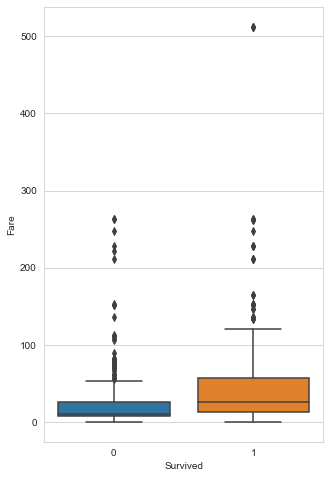

In [705]:
plt.figure(figsize=(5,8))
sns.boxplot(x="Survived",y="Fare",data=train)


In [706]:
fare_first = train["Fare"][train["Pclass"]==1].mean()
fare_second = train["Fare"][train["Pclass"]==2].mean()
fare_third = train["Fare"][train["Pclass"]==3].mean()
print("Average Fare for First class Passenger : ",fare_first)
print("Average Fare for Second class Passenger : ",fare_second)
print("Average Fare for Third class Passenger : ",fare_third)

Average Fare for First class Passenger :  84.1546875
Average Fare for Second class Passenger :  20.662183152173913
Average Fare for Third class Passenger :  13.675550101832993


c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

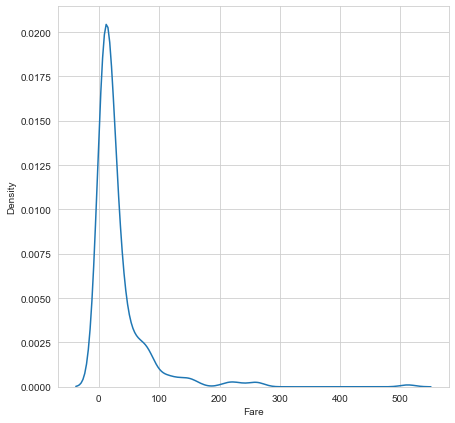

In [707]:
#Fare데이터 분포 확인
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(train["Fare"],  hist=False)

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

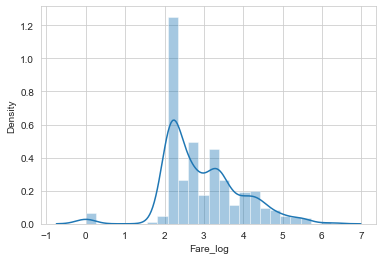

In [708]:
#Fare 로그처리 -> 정규분포로 바꿔주기
train["Fare_log"] =  np.log(train["Fare"] + 1)

#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(train["Fare_log"])

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

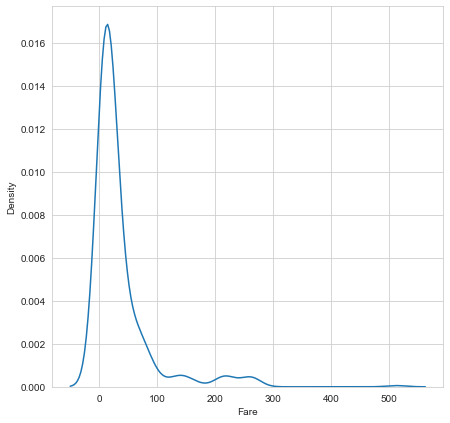

In [709]:
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(test["Fare"],  hist=False)


c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

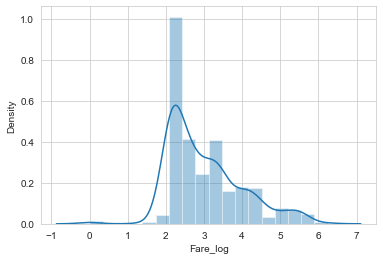

In [710]:
test["Fare_log"] =  np.log(test["Fare"] + 1)
#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(test["Fare_log"])

In [711]:
test["Fare"] = test["Fare"].fillna(0)

for i in range(418):
    if(test.at[i,"Fare"]==0):
        if(test.at[i,"Pclass"]==1):
            test.at[i,"Fare"]=fare_first
        elif(test.at[i,"Pclass"]==2):
            test.at[i,"Fare"]=fare_second
        else:
            test.at[i,"Fare"]=fare_third

(0.0, 100.0)

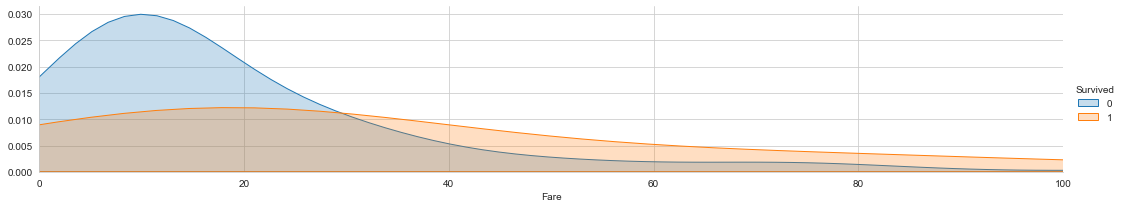

In [712]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Fare',shade=True)
fac.set(xlim=(0,train["Fare"].max()))
fac.add_legend()
plt.xlim(0,100)

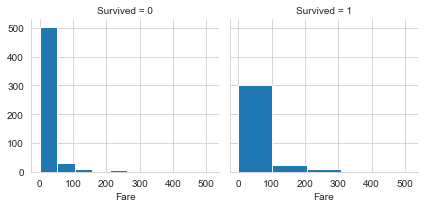

In [713]:
# Fare요금과 Survived의 관계1
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=5)

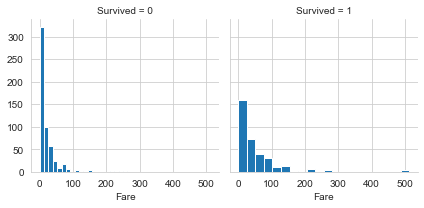

In [714]:
# Fare요금과 Survived의 관계2
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

### Family: SipSp + Parch

In [715]:
train["Family"] = train["SibSp"] + train["Parch"] + 1
test["Family"] = test["SibSp"] + test["Parch"] + 1


<AxesSubplot:xlabel='Survived', ylabel='count'>

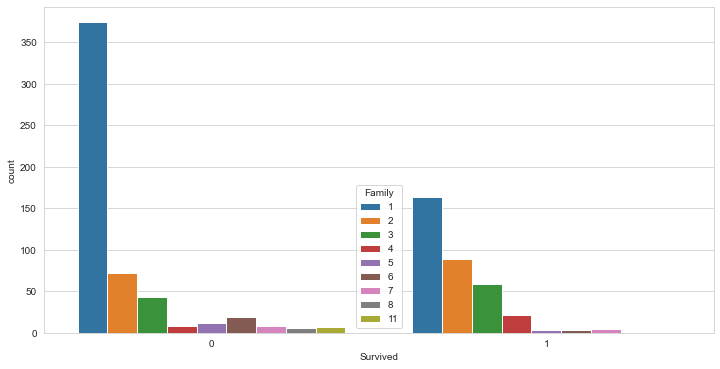

In [716]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Family", data = train)

## EDA

> **1.1.1. Pclass & Survived**

In [717]:
# Pclass등급과 생존률survive의 관계
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

- Pclass가 높을수록 생존률이 높았다.


> **1.1.2. Sex & Survived**

In [718]:
# Sex와 생존률survive의 관계
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
1    1  0.742038
0    0  0.188908

- 여성이 남성보다 생존률이 높다.

> **1.1.3. SibSp & Survived**

In [719]:
# SibSp과 생존률survive의 관계
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

- 배우자나 형제-자매가 1명 혹은 2명인 경우의 생존률이 비교적 높았다.


> **1.1.4. Parch & Survived**

In [720]:
# Parch와 생존률survive의 관계
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

- 부모 혹은 자식이 3명인 경우의 생존률이 가장 높았고, 1명 혹은 2명인 경우 절반 이상 생존했다.


> **1.1.5. Family & Survived**

In [721]:
# Family와 생존률survive의 관계
train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Family  Survived
3       4  0.724138
2       3  0.578431
1       2  0.552795
6       7  0.333333
0       1  0.303538
4       5  0.200000
5       6  0.136364
7       8  0.000000
8      11  0.000000

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


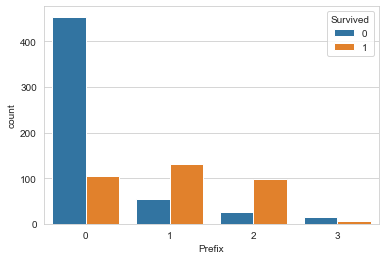

In [722]:
ax = sns.countplot("Prefix", hue='Survived', data=train)

- 0(Mr): 남성의 사망률이 높다.
- 1(Mrs), 2(Miss), 3(나머지): 사망률보다 생존률이 높다.


> **1.1.6. Cabin & Survived**

In [723]:
# Cabin과 생존률survive의 관계
list_p = []
for n in range(0,8):
    # 사망자/ (사망자 + 생존자) * 100
    p = cabin_count.Prefix[n]/(cabin_count.Prefix[n]+cabin_count.Prefix[n+7])*100
    list_p.append( [cabin_count.Cabin[n] , p] )
list_deck_point = pd.DataFrame(list_p)

In [724]:
list_deck_point['rate'] = list_deck_point[1]
list_deck_point = list_deck_point.drop(1,1)
list_deck_point.sort_values(by=['rate'], axis=0, ascending=False)

0       rate
0  A  88.888889
1  B  63.157895
2  C  40.677966
7  T  33.333333
4  E  24.242424
6  G  20.000000
3  D  18.604651
5  F  17.241379

In [725]:
# 생존률에 따라 점수 부여

cabin_mapping = {"A": 89, "G": 63, "C": 40, "T":33, "F":24, "B":20,"E":19,"D":17} 
train['Cabin_score'] = train['Cabin'].map(cabin_mapping)
train.Cabin_score.head()

0    24
1    40
2    24
3    40
4    24
Name: Cabin_score, dtype: int64

- A, B, C, T, E, G, D, F 순서로 생존률이 높았다. 
- T는 데이터가 하나 밖에 없기 때문에 삭제하는 편이 성능을 높일 것으로 보인다.
- T값을 33 혹은 조정치를 적용했을 때 모두 cabin_score과 survived의 관계는 낮았다.(차후 히트맵으로 제공 예정)


> **1.1.7. Embarked & Survived**

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


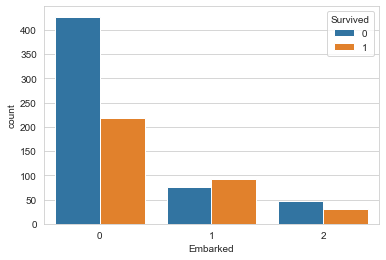

In [726]:
# Embarked승선지와 survived의 관계
ax = sns.countplot("Embarked", hue='Survived', data=train)

- S(Southhampton): 영국의 사우스햄튼에서 탑승한 사람들의 사망률이 높다.
- C(Cherbourg): 프랑스의 셰르부르에서 탐승한 사람은 많지 않으며 생존률이 더 높다.
- Q(Queenstown): 아일랜드의 퀸스타운.

- 타이타닉호는 1912년 4월 14일 사우스햄튼-셸부르-퀸즈타운을 거쳐 미국의 뉴욕으로 향했다.
- 1912년은 1차 세계대전이 발발하기 2년 전으로, 1871년 보불전쟁, 1878년 오스트리아-헝가리 제국의 보스니아 헤르체고비나 점령으로 인한 긴장이 팽팽했던 시기다. 이에 따라 유럽의 많은 사람들이 유럽을 떠나 미국으로 이민갔다.
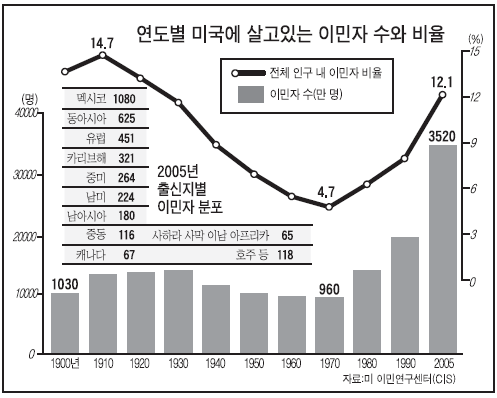
출처: https://news.joins.com/article/1765712?cloc=joongang|marticle|footer
- 항해를 시작할 때 사우스햄튼에서 탑승한 사람들의 사망률이 높았다. 여기에는 선원이 포함되어 있고, 셸부르와 퀸즈타운은 선원이 없을 것으로 추정된다.
- 이 가정이 맞다면 앞서 요금이 0에 가까운 사람들의 사망률이 높은 것도 선원이기 때문으로 추측된다.


c:\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


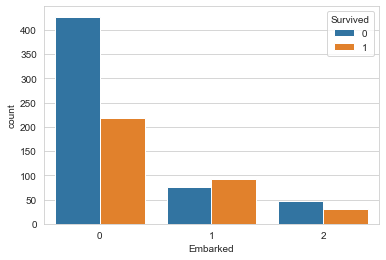

In [727]:
# Embarked승선지와 survived의 관계
ax = sns.countplot("Embarked", hue='Survived', data=train)

- S(Southhampton): 영국의 사우스햄튼에서 탑승한 사람들의 사망률이 높다.
- C(Cherbourg): 프랑스의 셰르부르에서 탐승한 사람은 많지 않으며 생존률이 더 높다.
- Q(Queenstown): 아일랜드의 퀸스타운.

- 타이타닉호는 1912년 4월 14일 사우스햄튼-셸부르-퀸즈타운을 거쳐 미국의 뉴욕으로 향했다.
- 1912년은 1차 세계대전이 발발하기 2년 전으로, 1871년 보불전쟁, 1878년 오스트리아-헝가리 제국의 보스니아 헤르체고비나 점령으로 인한 긴장이 팽팽했던 시기다. 이에 따라 유럽의 많은 사람들이 유럽을 떠나 미국으로 이민갔다.
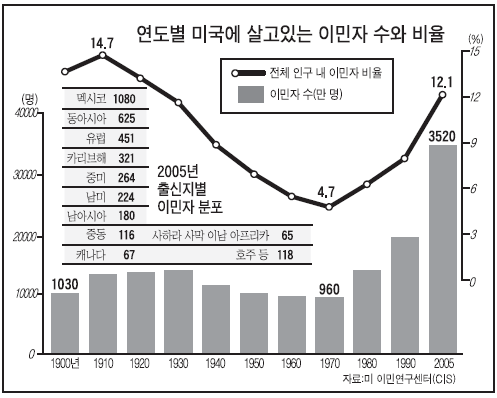
출처: https://news.joins.com/article/1765712?cloc=joongang|marticle|footer
- 항해를 시작할 때 사우스햄튼에서 탑승한 사람들의 사망률이 높았다. 여기에는 선원이 포함되어 있고, 셸부르와 퀸즈타운은 선원이 없을 것으로 추정된다.
- 이 가정이 맞다면 앞서 요금이 0에 가까운 사람들의 사망률이 높은 것도 선원이기 때문으로 추측된다.


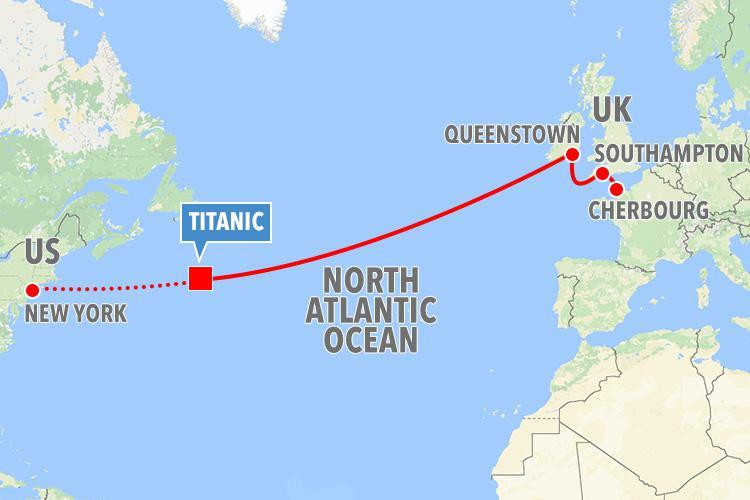
출처: https://www.thesun.ie/news/5091958/titanic-expert-claims-that-ship-was-on-fire-for-days-before-it-hit-iceberg-during-doomed-maiden-voyage/

### 1.2. 수치형 변수와 survived관계


> **1.2.1. Age & Survived**

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

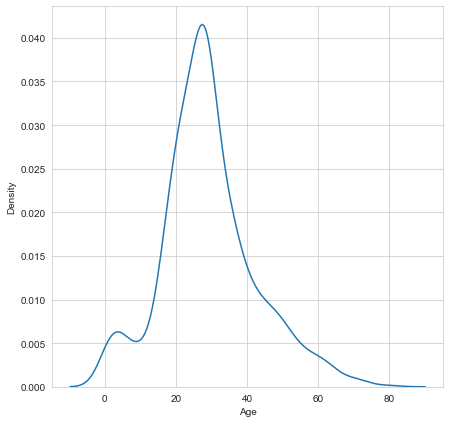

In [728]:
#Age데이터 분포확인
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(train["Age"],  hist=False)

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_log', ylabel='Density'>

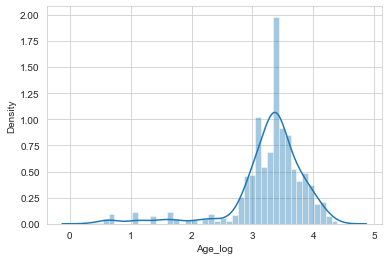

In [729]:
#Age 로그처리-> 정규분포로 바꿔주기
train["Age_log"] =  np.log(train["Age"]+ 1)
test["Age_log"] =  np.log(test["Age"]+ 1)
#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(train["Age_log"])

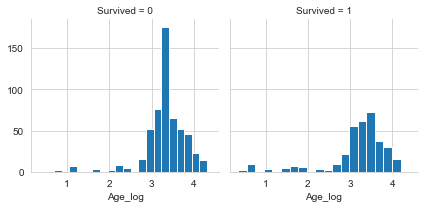

In [730]:
# Age연령과 survived의 관계
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age_log', bins=20)

- 0(notsurvived): 0대, 10대의 생존률이 높다, 20~40대의 생존률이 낮다. 60대 이상의 생존률은 높다.
- 1(survived): 0대의 생존률이 높지만 10대의 생존률은 낮다. 60대 이상의 생존률이 낮다.



> **1.2.2. Fare & Survived**

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

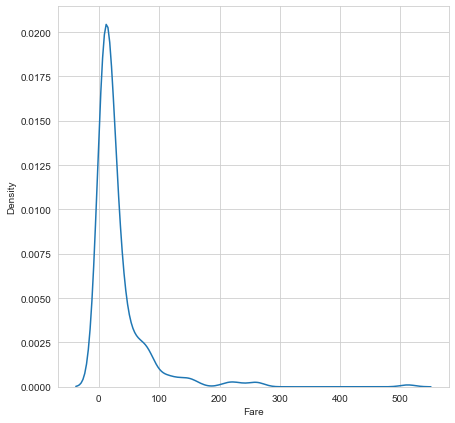

In [731]:
#Fare데이터 분포 확인
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(train["Fare"],  hist=False)

c:\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

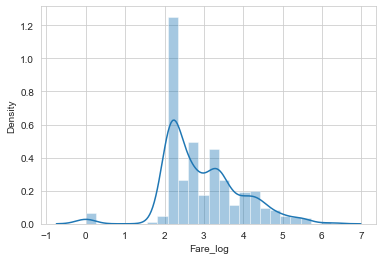

In [732]:
#Fare 로그처리 -> 정규분포로 바꿔주기
train["Fare_log"] =  np.log(train["Fare"] + 1)
#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(train["Fare_log"])

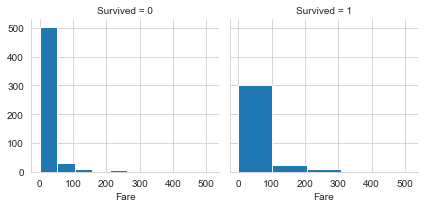

In [733]:
# Fare요금과 Survived의 관계1
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=5)

- 요금Fare이 낮은 경우 사망률이 높지만, 전체적으로 많은 사람들이 낮은 요금을 사용했기 때문에 생존률도 제일 높다.

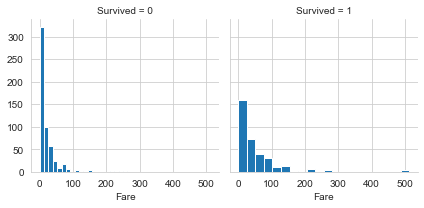

In [734]:
# Fare요금과 Survived의 관계2
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

- 낮은 요금을 낼 수록 사망률이 높지만, 사람이 많은 만큼 생존률도 높은 경향을 보인다.

In [735]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    uint8  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     891 non-null    int32  
 10  Prefix       891 non-null    int64  
 11  Fare_log     891 non-null    float64
 12  Family       891 non-null    int64  
 13  Cabin_score  891 non-null    int64  
 14  Age_log      891 non-null    float64
dtypes: float64(4), int32(1), int64(7), object(2), uint8(1)
memory usage: 95.0+ KB


## 1.3. 두가지 이상의 변수와 생존률Survived의 관계


> **1.3.1. Sex, Pclass & Survived**

In [736]:
train.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass         1         2         3
Sex                                 
0       0.368852  0.157407  0.135447
1       0.968085  0.921053  0.500000

- 여성: 1, 2 등급 객실의 여성은 각각 96%, 92% 생존했고, 3등급 객실의 여성도 50% 생존
- 남성: 1등급 객실의 남성이 36% 생존하고 2, 3 등급 객실의 남성은 15%이하로 생존

In [737]:
# 10년씩 구분
bins = [10, 20, 30, 40, 50, 60, 70]
train['Age_dgt'] = np.digitize(train['Age'], bins)
train.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare Cabin  Embarked  Prefix  Fare_log  Family  \
0  22.0      1      0   7.2500     F         0       0  2.110213       2   
1  38.0      1      0  71.2833     C         1       2  4.280593       2   
2  26.0      0      0   7.9250     F         0       1  2.188856       1   
3  35.0      1      0  53.1000     C         0       2  3.990834       2   
4  35.0      0      0   8.0500     F         0       0  2.202765       1   

   Cabin_score   Age_log  Age_dgt  
0           24  3.135494        2  
1           40  3.663562        3  
2           24  3.295837        2  
3           40  3.583519        3  
4           24  3.583519        3


> **1.3.2. Sex, Age_dgt & Survived**

In [738]:
train.pivot_table('Survived', index='Sex', columns='Age_dgt')

Age_dgt         0         1         2         3         4         5         6  \
Sex                                                                             
0        0.593750  0.122807  0.151292  0.214953  0.206897  0.133333  0.133333   
1        0.633333  0.755556  0.685185  0.831169  0.687500  0.888889  1.000000   

Age_dgt         7  
Sex                
0        0.142857  
1             NaN

- 60대 여성, 50대 여성, 30대 여성, 10대 여성, 40대 여성, 20대 여성, 10세 미만 여성, 10세 미만 남성 순으로 생존률이 높았으며, 10대 이상 남성의 생존률은 21%를 넘지 못했다.


> **1.3.3. Sex, Fare & Survived**

In [739]:
train.pivot_table('Survived', index='Sex', columns='Fare')

Fare  0.0000    4.0125    5.0000    6.2375    6.4375    6.4500    6.4958    \
Sex                                                                          
0     0.066667       0.0       0.0       0.0       0.0       0.0       0.0   
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

Fare  6.7500    6.8583    6.9500    ...  153.4625  164.8667  211.3375  \
Sex                                 ...                                 
0          0.0       0.0       0.0  ...       0.0       NaN       NaN   
1          0.0       NaN       NaN  ...       1.0       1.0       1.0   

Fare  211.5000  221.7792  227.5250  247.5208  262.3750  263.0000  512.3292  
Sex                                                                         
0          0.0       0.0       0.0       0.0       NaN       0.0       1.0  
1          NaN       NaN       1.0       1.0       1.0       1.0       1.0  

[2 rows x 248 columns]

In [740]:
# Fare_log로 구분
bins = [1, 2, 3, 4, 5, 6, 7]
train['Fare_dgt'] = np.digitize(train['Fare_log'], bins)
train.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare Cabin  Embarked  Prefix  Fare_log  Family  \
0  22.0      1      0   7.2500     F         0       0  2.110213       2   
1  38.0      1      0  71.2833     C         1       2  4.280593       2   
2  26.0      0      0   7.9250     F         0       1  2.188856       1   
3  35.0      1      0  53.1000     C         0       2  3.990834       2   
4  35.0      0      0   8.0500     F         0       0  2.202765       1   

   Cabin_score   Age_log  Age_dgt  Fare_dgt  
0           24  3.135494        2         2  
1           40  3.663562        3         4  
2           24  3.295837        2         2  
3           40  3.583519        3         3  
4           24  3.583519        3         2

In [741]:
train.pivot_table('Survived', index='Sex', columns='Fare_dgt')

Fare_dgt         0    1         2         3         4         5    6
Sex                                                                 
0         0.066667  0.0  0.133144  0.262069  0.392157  0.125000  1.0
1              NaN  NaN  0.654412  0.704082  0.950820  0.888889  1.0

- 성별을 불문하고 돈을 많이 낸 사람들은 모두 살아남았다
- 여성의 경우 Fare가 높을 수록 생존률survived가 높은 경향을 보인다.
- 남성의 경우 Fare_log가 4에 해당하는 경우의 생존률이 39%로 다른 경우보다 높았다.


> **1.3.4. Age_dgt, Fare_dgt & Survived**

In [742]:
train.pivot_table('Survived', index='Age_dgt', columns='Fare_dgt')

Fare_dgt         0    1         2         3         4         5    6
Age_dgt                                                             
0              NaN  NaN  0.875000  0.511628  1.000000  0.500000  NaN
1         0.000000  NaN  0.328125  0.363636  0.818182  0.750000  NaN
2         0.111111  0.0  0.246154  0.430769  0.500000  0.500000  NaN
3         0.000000  0.0  0.277778  0.509804  0.939394  0.666667  1.0
4         0.000000  NaN  0.200000  0.416667  0.615385  1.000000  NaN
5              NaN  NaN  0.176471  0.466667  0.571429  1.000000  NaN
6              NaN  0.0  0.500000  0.000000  0.800000  0.000000  NaN
7              NaN  NaN  0.000000  0.333333  0.000000       NaN  NaN


> **1.3.5. Pclass, Fare_dgt & Survived**

In [743]:
train.pivot_table('Survived', index='Pclass', columns='Fare_dgt')

Fare_dgt     0    1         2         3         4         5    6
Pclass                                                          
1         0.00  0.0       NaN  0.500000  0.780220  0.653846  1.0
2         0.00  NaN  0.416667  0.600000  0.285714       NaN  NaN
3         0.25  0.0  0.244275  0.217949  0.357143       NaN  NaN

Age_dgt, Fare_dgt 그리고 Pclass, Fare_dgt와 Survived의 관계를 조사한 결과 뚜렷한 경향성을 파악할 수 없었다.


> **1.3.6. Family_dgt, Age_dgt & Survived**

In [744]:
# Family를 0명, 1명 3명 이상으로 구분
# 1: 본인 혼자
# 2: 배우자, 자식, 혹은 부모 중 1인
# 3: 본인을 포함한 가족구성원 >=3
bins = [0, 1, 2]
train['Family_dgt'] = np.digitize(train['Family'], bins)
test['Family_dgt'] = np.digitize(test['Family'], bins)

train.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare Cabin  Embarked  Prefix  Fare_log  Family  \
0  22.0      1      0   7.2500     F         0       0  2.110213       2   
1  38.0      1      0  71.2833     C         1       2  4.280593       2   
2  26.0      0      0   7.9250     F         0       1  2.188856       1   
3  35.0      1      0  53.1000     C         0       2  3.990834       2   
4  35.0      0      0   8.0500     F         0       0  2.202765       1   

   Cabin_score   Age_log  Age_dgt  Fare_dgt  Family_dgt  
0           24  3.135494        2         2           3  
1           40  3.663562        3         4           3  
2           24  3.295837        2         2           2  
3           40  3.583519        3         3           3  
4           24  3.583519        3         2           2

In [745]:
train.pivot_table('Survived', index='Family_dgt', columns='Age_dgt')

Age_dgt            0         1         2         3      4         5         6  \
Family_dgt                                                                      
2           1.000000  0.320755  0.264493  0.394495  0.340  0.275862  0.230769   
3           0.606557  0.489796  0.407767  0.586667  0.425  0.631579  0.500000   

Age_dgt            7  
Family_dgt            
2           0.166667  
3           0.000000

- 가족 없이 혼자 탑승한 사람들은 유아를 제외하고 35%이하의 생존률을 보였다
- 2인 가족의 경우 유아와 10대의 생존률이 각각 835, 69%로 높지만 20, 30, 40대에서 53%이하의 생존률을 보이고 50, 60대에서 다시 60% 이상의 생존률을 기록했다.
- 3인 이상 가족의 경우 유아와 50대의 생존률이 높았지만 60대 이상의 생존률이 낮았다. 또, 10대부터 40대까지 30~40%의 낮은 생존률을 기록했다.


> **1.3.7. Parch, Age_dgt & Survived**

In [746]:
train.pivot_table('Survived', index='Age_dgt', columns='Parch')

Parch           0         1         2    3    4     5    6
Age_dgt                                                   
0        1.000000  0.657143  0.538462  NaN  NaN   NaN  NaN
1        0.380282  0.400000  0.533333  0.0  NaN   NaN  NaN
2        0.279635  0.500000  0.400000  1.0  0.0   NaN  NaN
3        0.453333  0.550000  0.700000  NaN  NaN  0.25  NaN
4        0.367647  0.571429  0.333333  0.0  0.0  0.00  0.0
5        0.368421  0.625000  0.000000  1.0  NaN   NaN  NaN
6        0.333333  0.333333       NaN  NaN  0.0   NaN  NaN
7        0.166667  0.000000       NaN  NaN  NaN   NaN  NaN

- 유아와 10대의 경우 부모가 없는 경우보다 있는 경우에 생존률이 높은 경향을 보였다.


> **1.3.8. Sex, Parch, Age_dgt & Survived**

In [747]:
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='Parch')

Parch               0         1         2    3    4         5    6
Sex Age_dgt                                                       
0   0             NaN  0.600000  0.583333  NaN  NaN       NaN  NaN
    1        0.119048  0.000000  0.333333  0.0  NaN       NaN  NaN
    2        0.145669  0.444444  0.000000  NaN  NaN       NaN  NaN
    3        0.212766  0.222222  0.333333  NaN  NaN  0.000000  NaN
    4        0.235294  0.000000  0.000000  NaN  0.0       NaN  NaN
    5        0.153846  0.000000  0.000000  NaN  NaN       NaN  NaN
    6        0.090909  0.333333       NaN  NaN  0.0       NaN  NaN
    7        0.166667  0.000000       NaN  NaN  NaN       NaN  NaN
1   0        1.000000  0.733333  0.500000  NaN  NaN       NaN  NaN
    1        0.758621  0.857143  0.666667  NaN  NaN       NaN  NaN
    2        0.733333  0.538462  0.588235  1.0  0.0       NaN  NaN
    3        0.857143  0.818182  0.857143  NaN  NaN  0.333333  NaN
    4        0.764706  0.888889  0.500000  0.0  0.0  0.000000  0.0
    5        0.833333  1.000000       NaN  1.0  NaN       NaN  NaN
    6        1.000000       NaN       NaN  NaN  NaN       NaN  NaN

- 부모가 없는 유아 여성은 모두 생존했고, 오히려 부모가 있는 유아 여성의 생존률이 낮았다. 
- 반대로 유아 남성의 경우 부모가 존재하는 경우의 생존률이 높았다.


> **1.3.9. Sex, SibSp, Age_dgt & Survived**

In [748]:
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='SibSp')

SibSp               0         1      2    3     4    5    8
Sex Age_dgt                                                
0   0        1.000000  1.000000  1.000  0.0  0.10  0.0  NaN
    1        0.135135  0.153846  0.000  0.0  0.00  0.0  NaN
    2        0.142222  0.242424  0.125  0.0   NaN  NaN  0.0
    3        0.222222  0.208333  0.000  NaN   NaN  NaN  NaN
    4        0.166667  0.357143  0.000  NaN   NaN  NaN  NaN
    5        0.120000  0.000000  1.000  NaN   NaN  NaN  NaN
    6        0.083333  0.333333    NaN  NaN   NaN  NaN  NaN
    7        0.166667  0.000000    NaN  NaN   NaN  NaN  NaN
1   0        0.888889  0.750000  0.800  0.0  0.25  NaN  NaN
    1        0.785714  0.833333  0.500  NaN  0.50  0.0  NaN
    2        0.761194  0.607143  0.800  0.4   NaN  NaN  0.0
    3        0.800000  0.857143    NaN  1.0   NaN  NaN  NaN
    4        0.764706  0.600000    NaN  NaN   NaN  NaN  NaN
    5        0.818182  1.000000  1.000  NaN   NaN  NaN  NaN
    6        1.000000  1.000000    NaN  NaN   NaN  NaN  NaN


> **1.3.10. Sex, Embarked, Age_dgt & Survived**

In [749]:
train.pivot_table('Survived', index=['Sex'], columns='Embarked')

Embarked         0         1         2
Sex                                   
0         0.174603  0.305263  0.073171
1         0.692683  0.876712  0.750000

In [750]:
train.pivot_table('Survived', index=['Age_dgt'], columns='Embarked')

Embarked         0         1         2
Age_dgt                               
0         0.612245  0.888889  0.000000
1         0.315789  0.650000  0.666667
2         0.238462  0.454545  0.433962
3         0.446043  0.594595  0.375000
4         0.333333  0.611111  0.000000
5         0.382353  0.538462  0.000000
6         0.266667  0.666667  0.000000
7         0.250000  0.000000  0.000000

In [751]:
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='Embarked')

Embarked            0         1         2
Sex Age_dgt                              
0   0        0.653846  1.000000  0.000000
    1        0.100000  0.333333  0.000000
    2        0.119171  0.300000  0.107143
    3        0.215909  0.235294  0.000000
    4        0.177778  0.400000  0.000000
    5        0.130435  0.166667  0.000000
    6        0.083333  0.500000  0.000000
    7        0.250000  0.000000  0.000000
1   0        0.565217  0.857143       NaN
    1        0.730769  0.785714  0.800000
    2        0.582090  0.937500  0.800000
    3        0.843137  0.900000  0.500000
    4        0.625000  0.875000       NaN
    5        0.909091  0.857143       NaN
    6        1.000000  1.000000       NaN


> **1.3.11. Sex, Title, Age_dgt & Survived**

In [752]:
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='Prefix')

Prefix              0         1         2         3
Sex Age_dgt                                        
0   0        0.593750       NaN       NaN       NaN
    1        0.122807       NaN       NaN       NaN
    2        0.152985       NaN       NaN  0.000000
    3        0.209524       NaN       NaN  0.500000
    4        0.226415       NaN       NaN  0.000000
    5        0.043478       NaN       NaN  0.428571
    6        0.142857       NaN       NaN  0.000000
    7        0.142857       NaN       NaN       NaN
1   0             NaN  0.633333       NaN       NaN
    1             NaN  0.722222  0.888889       NaN
    2             NaN  0.658228  0.750000  1.000000
    3             NaN  0.821429  0.833333  1.000000
    4             NaN  0.833333  0.640000  1.000000
    5             NaN  0.833333  0.916667       NaN
    6             NaN  1.000000  1.000000       NaN

In [753]:
train.pivot_table('Survived', index=['Prefix','Age_dgt'], columns='SibSp')
# "Mr":0, "Mrs":1, "Miss":2, Other:3

SibSp                  0         1         2    3     4    5    8
Prefix Age_dgt                                                   
0      0        1.000000  1.000000  1.000000  0.0  0.10  0.0  NaN
       1        0.135135  0.153846  0.000000  0.0  0.00  0.0  NaN
       2        0.144144  0.242424  0.125000  0.0   NaN  NaN  0.0
       3        0.215190  0.208333  0.000000  NaN   NaN  NaN  NaN
       4        0.184211  0.357143  0.000000  NaN   NaN  NaN  NaN
       5        0.050000  0.000000       NaN  NaN   NaN  NaN  NaN
       6        0.090909  0.333333       NaN  NaN   NaN  NaN  NaN
       7        0.166667  0.000000       NaN  NaN   NaN  NaN  NaN
1      0        0.888889  0.750000  0.800000  0.0  0.25  NaN  NaN
       1        0.777778  0.750000  0.500000  NaN  0.50  0.0  NaN
       2        0.727273  0.615385  0.666667  0.4   NaN  NaN  0.0
       3        0.800000  1.000000       NaN  NaN   NaN  NaN  NaN
       4        0.800000  1.000000       NaN  NaN   NaN  NaN  NaN
       5        0.800000  1.000000       NaN  NaN   NaN  NaN  NaN
       6             NaN  1.000000       NaN  NaN   NaN  NaN  NaN
2      1        1.000000  0.875000       NaN  NaN   NaN  NaN  NaN
       2        0.909091  0.600000  1.000000  NaN   NaN  NaN  NaN
       3        0.785714  0.843750       NaN  1.0   NaN  NaN  NaN
       4        0.727273  0.571429       NaN  NaN   NaN  NaN  NaN
       5        0.833333  1.000000  1.000000  NaN   NaN  NaN  NaN
       6        1.000000  1.000000       NaN  NaN   NaN  NaN  NaN
3      2        0.250000       NaN       NaN  NaN   NaN  NaN  NaN
       3        0.666667       NaN       NaN  NaN   NaN  NaN  NaN
       4        0.200000       NaN  0.000000  NaN   NaN  NaN  NaN
       5        0.400000  0.000000  1.000000  NaN   NaN  NaN  NaN
       6        0.000000       NaN       NaN  NaN   NaN  NaN  NaN


> **1.3.12. Fare, Pclass & Survived**

In [754]:
# Fare_log를 1~7로 구분
# 클 수록 많은 Fare를 지출

bins = [0, 1, 2, 3, 4, 5, 6, 7]
train['Fare_log_dgt'] = np.digitize(train['Fare_log'], bins)
train.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare Cabin  Embarked  Prefix  Fare_log  Family  \
0  22.0      1      0   7.2500     F         0       0  2.110213       2   
1  38.0      1      0  71.2833     C         1       2  4.280593       2   
2  26.0      0      0   7.9250     F         0       1  2.188856       1   
3  35.0      1      0  53.1000     C         0       2  3.990834       2   
4  35.0      0      0   8.0500     F         0       0  2.202765       1   

   Cabin_score   Age_log  Age_dgt  Fare_dgt  Family_dgt  Fare_log_dgt  
0           24  3.135494        2         2           3             3  
1           40  3.663562        3         4           3             5  
2           24  3.295837        2         2           2             3  
3           40  3.583519        3         3           3             4  
4           24  3.583519        3         2           2             3

In [755]:
train.pivot_table('Survived', index='Pclass', columns='Fare_log')

Fare_log  0.000000  1.611935  1.791759  1.979276  2.006535  2.008214  \
Pclass                                                                 
1             0.00       NaN       0.0       NaN       NaN       NaN   
2             0.00       NaN       NaN       NaN       NaN       NaN   
3             0.25       0.0       NaN       0.0       0.0       0.0   

Fare_log  2.014343  2.047693  2.061570  2.073172  ...  5.039951  5.111184  \
Pclass                                            ...                       
1              NaN       NaN       NaN       NaN  ...  0.666667       1.0   
2              NaN       NaN       NaN       NaN  ...       NaN       NaN   
3              0.0       0.0       0.0       0.0  ...       NaN       NaN   

Fare_log  5.358177  5.358942  5.406181  5.431646  5.515527  5.573579  \
Pclass                                                                 
1              1.0       0.0       0.0      0.75       0.5       1.0   
2              NaN       NaN       NaN       NaN       NaN       NaN   
3              NaN       NaN       NaN       NaN       NaN       NaN   

Fare_log  5.575949  6.240917  
Pclass                        
1              0.5       1.0  
2              NaN       NaN  
3              NaN       NaN  

[3 rows x 248 columns]

In [756]:
# Fare_log_dgt와 생존률survive의 관계
train[['Fare_log_dgt', 'Survived']].groupby(['Fare_log_dgt'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Fare_log_dgt  Survived
6             7  1.000000
4             5  0.696429
5             6  0.653846
3             4  0.440329
2             3  0.278119
0             1  0.066667
1             2  0.000000

In [757]:
train.pivot_table('Survived', index='Pclass', columns='Fare_log_dgt')

Fare_log_dgt     1    2         3         4         5         6    7
Pclass                                                              
1             0.00  0.0       NaN  0.500000  0.780220  0.653846  1.0
2             0.00  NaN  0.416667  0.600000  0.285714       NaN  NaN
3             0.25  0.0  0.244275  0.217949  0.357143       NaN  NaN

In [758]:
corr = train[['Fare_log_dgt', 'Pclass']].corr()
print(corr)
# -0.61: 높은 상관관계

              Fare_log_dgt    Pclass
Fare_log_dgt      1.000000 -0.619297
Pclass           -0.619297  1.000000


## 1.4. EDA 정리

- Pclass: 등급이 높을수록 생존률이 높은 경향을 보였다.
- Sex: 여성이 남성보다 생존률이 높은 경향을 보였다.
- Family: 가족이 1~3명인 경우 생존률이 높다.(본인 제외) - 4인가족인 경우 생존률이 가장 높았다.
- Cabin: A, G, C, F, B, E, D 순서로 생존률이 높았다.
- Fare_log_dgt: 7, 5, 6, 4, 3, 1, 2 순서로 생존률이 높았다. (값이 클 수록 많은 Fare를 지출)
- Pclass & Fare_log_dgt: Pclass가 1이면서 많은 Fare를 지출한 사람들이 많이 생존했다. 하지만 Pclass가 2인 경우 많은 Fare를 지출했다고 해서 생존률이 높지는 않았다. Pclass가 3인 경우 미미하게 생존률이 증가하기는 했지만 대체적으로 낮은 생존률을 보였다. 비슷한 요금을 지불했음에도 Pclass별로 생존률이 차이났음을 알 수 있다. 여기서 배의 구조가 생존률에 영향을 끼쳤을 가능성이 있다고 생각되었다.
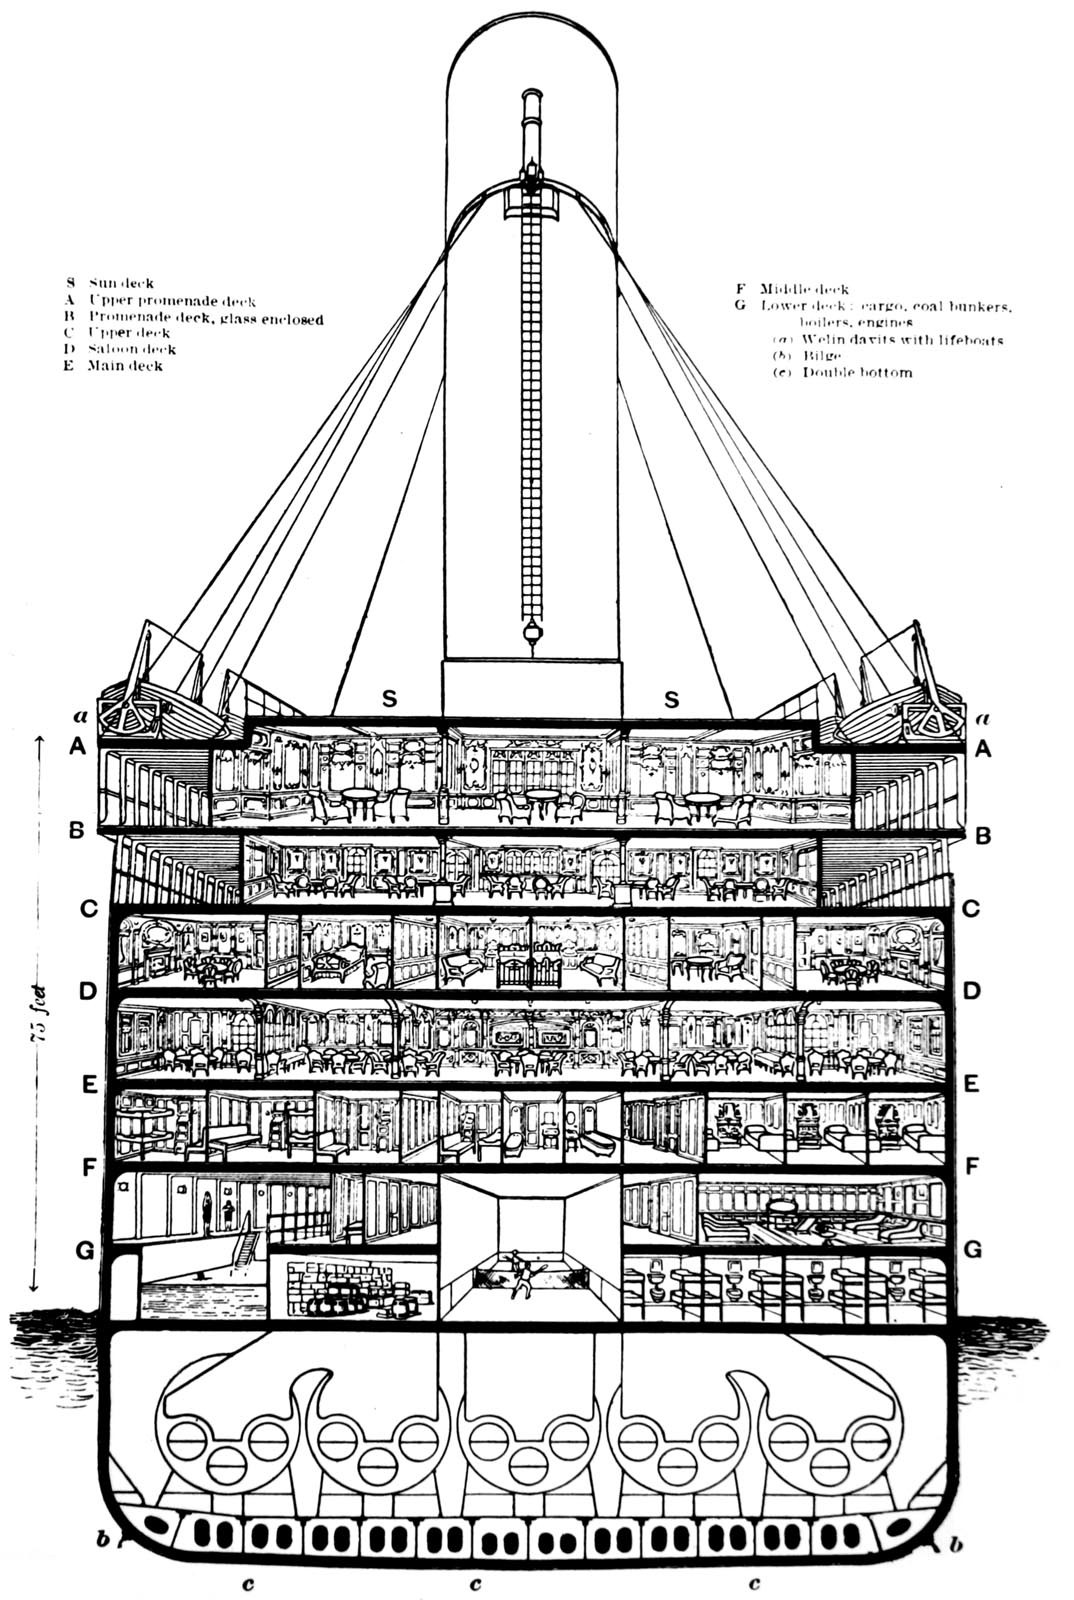
https://www.anatomynote.com/wp-content/uploads/2019/09/15465/Titanic-sectional-structure-diagram.jpg
https://www.anatomynote.com/transportation-anatomy/ship-anatomy/titanic-sectional-structure-diagram/
- 타이타닉호는 알파벳 순서로 갑판과 가장 가깝고, 많은 비용Fare를 지출하는 구조였다. 
    - S(일광욕용 갑판Sun deck)
    - A(상부 산책로 갑판Upper promenade deck): 배를 둘러싼 복도가 외부로 뚫려 있어 산책할 수 있다. 1등실 객실, 라운지, 흡연실, 독서실, 야자수 코트
    - B(선교루 갑판Promenade deck), glass enclosed: 1등급 객실, 레스토랑, 카페, 선미 부분에 3등실 산책로
    - C(상층 갑판Upper deck): 3등실 산책로, 선원 숙소, 3등실 전용 휴게실과 흡연실, 1등실 객실, 2등실 도서관
    - D(살롱 갑판Saloon deck): 1등실 대합실, 1등실 식당, 2등실 식당, 1,2,3등급 객실, 화부 숙소
    - E(메인 갑판Main deck): 1, 2, 3등실 객실 및 선원숙소
    - F(중간 갑판Middle deck): 대부분의 3등실 객실과 2등 객실 및 선원숙소, 3등실 식당, 1등실용 수영장
    - G(하부 갑판Lower deck): 객실이 있는 가장 낮은 갑판, 스쿼시장, 창고, 보일러실, 기관실 등

1. Fare가 높을 수록 Pclass가 낮다(대우도 성립).
2. Fare가 높고, Pclass가 낮을수록 배의 윗부분Cabin에서 주로 생활했다.
3. 다만 fare_log_dgt와 Pclass의 상관관계에서 0.39에 해당하는 사람들은 다른 Pclass와 Cabin 위치가 섞인 경우다.

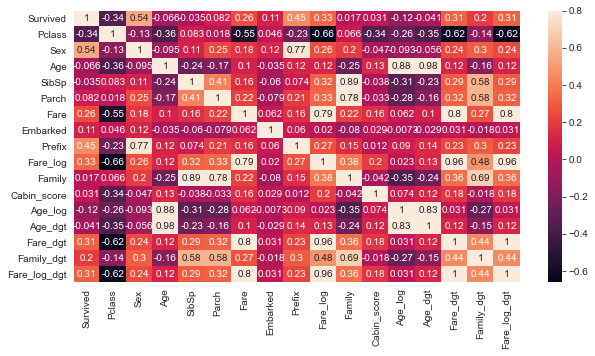

In [759]:
# 히트맵

correlation_matrix = train.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,vmax=0.8,annot=True) 
plt.show()

# Survived의 상관관계를 보면
# Fare_log가 -0.66으로 높다
# Age 남기고 Age_log, Age_log2, Fare, Fare_log2 삭제

> **Survived와 관계**
1. Sex: 0.54
2. Title: 0.44
3. Pclass: -0.34
4. Fare_log: 0.33

- 컬럼 삭제: 절대값 0.1 미만, 중복되는 값(fare, fare_log 등)

In [761]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Prefix', 'Fare_log', 'Family', 'Cabin_score',
       'Age_log', 'Age_dgt', 'Fare_dgt', 'Family_dgt', 'Fare_log_dgt'],
      dtype='object')

In [765]:
train_df = train[['Survived','Pclass','Sex','Embarked','Prefix','Fare_log','Age_log','Family_dgt']]

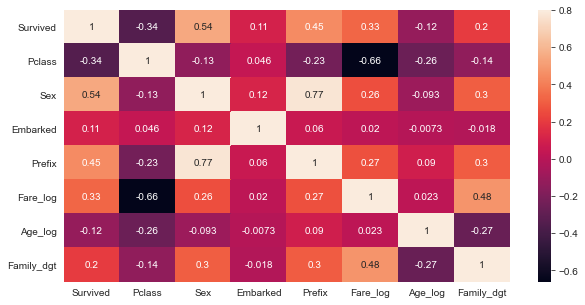

In [766]:
correlation_matrix = train_df.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,vmax=0.8,annot=True) 
plt.show()

> **Survived와 관계**
1. Sex: 0.54
2. Prefix: 0.45
3. Pclass: -0.34
4. Fare_log: 0.33
5. Family_dgt: 0.2
6. Age_log: -0.12
7. Embarked: 0.11

# Classification

In [767]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Prefix', 'Fare_log', 'Family', 'Cabin_score',
       'Age_log', 'Age_dgt', 'Fare_dgt', 'Family_dgt', 'Fare_log_dgt'],
      dtype='object')

In [769]:
X = train_df
Y = train["Survived"]
X_TEST = test[['Pclass','Sex','Embarked','Prefix','Fare_log','Age_log',"Family_dgt"]]

In [770]:
X

Survived  Pclass  Sex  Embarked  Prefix  Fare_log   Age_log  Family_dgt
0           0       3    0         0       0  2.110213  3.135494           3
1           1       1    1         1       2  4.280593  3.663562           3
2           1       3    1         0       1  2.188856  3.295837           2
3           1       1    1         0       2  3.990834  3.583519           3
4           0       3    0         0       0  2.202765  3.583519           2
..        ...     ...  ...       ...     ...       ...       ...         ...
886         0       2    0         0       3  2.639057  3.332205           2
887         1       1    1         0       1  3.433987  2.995732           2
888         0       3    1         0       1  3.196630  3.113515           3
889         1       1    0         1       0  3.433987  3.295837           2
890         0       3    0         2       0  2.169054  3.496508           2

[891 rows x 8 columns]

test의 
Embarked   
Prefix      
Fare_log   
Age_log
결측치 제거 

In [775]:
X_TEST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    uint8  
 2   Embarked    418 non-null    int32  
 3   Prefix      417 non-null    float64
 4   Fare_log    417 non-null    float64
 5   Age_log     332 non-null    float64
 6   Family_dgt  418 non-null    int64  
dtypes: float64(3), int32(1), int64(2), uint8(1)
memory usage: 18.5 KB


In [771]:
X_TEST

Pclass  Sex  Embarked  Prefix  Fare_log   Age_log  Family_dgt
0         3    0         2     0.0  2.178064  3.569533           2
1         3    1         0     2.0  2.079442  3.871201           3
2         2    0         2     0.0  2.369075  4.143135           2
3         3    0         0     0.0  2.268252  3.332205           2
4         3    1         0     2.0  2.586824  3.135494           3
..      ...  ...       ...     ...       ...       ...         ...
413       3    0         0     0.0  2.202765       NaN           2
414       1    1         1     NaN  4.699571  3.688879           2
415       3    0         0     0.0  2.110213  3.676301           2
416       3    0         0     0.0  2.202765       NaN           2
417       3    0         1     0.0  3.150952       NaN           3

[418 rows x 7 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    print("For k = ",i," : ",accuracy_score(y_test,yhat))

For k =  1  :  0.6815642458100558
For k =  2  :  0.6983240223463687
For k =  3  :  0.7430167597765364
For k =  4  :  0.6759776536312849
For k =  5  :  0.7039106145251397
For k =  6  :  0.6815642458100558
For k =  7  :  0.7150837988826816
For k =  8  :  0.7094972067039106
For k =  9  :  0.7039106145251397
For k =  10  :  0.6871508379888268
For k =  11  :  0.6983240223463687
For k =  12  :  0.7094972067039106
For k =  13  :  0.6983240223463687
For k =  14  :  0.6815642458100558
For k =  15  :  0.6871508379888268
For k =  16  :  0.6871508379888268
For k =  17  :  0.7039106145251397
For k =  18  :  0.6927374301675978
For k =  19  :  0.6759776536312849


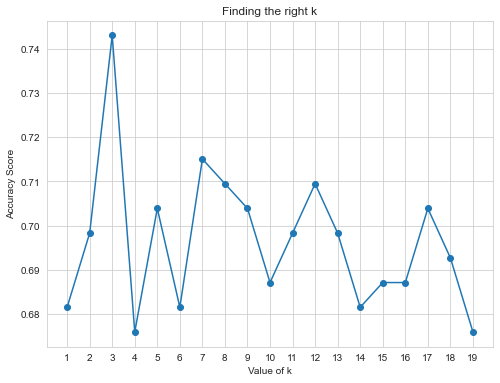

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,20),acc, marker = "o")
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.show()

In [ ]:
import numpy as np
np.sum(X.isna())

Pclass    0
Sex       0
Age       0
Fare      0
Cabin     0
Prefix    0
Q         0
S         0
Family    0
dtype: int64

In [ ]:
np.sum(Y.isna())

0

In [ ]:
np.sum(X_test.isna())

Pclass    0
Sex       0
Age       0
Fare      0
Cabin     0
Prefix    0
Q         0
S         0
Family    0
dtype: int64

In [ ]:
X["Sex"].unique()

array([0, 1], dtype=uint8)

In [ ]:
Y.unique()

array([0, 1], dtype=int64)

In [657]:
X_test["Sex"].unique()

array([1, 0], dtype=uint8)

In [658]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X,Y)


KNeighborsClassifier(n_neighbors=3)

In [659]:
y_pred = KNN.predict(X_TEST)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [660]:

df_KNN = pd.DataFrame()
df_KNN["PassengerId"] = test["PassengerId"]
df_KNN["Survived"] = y_pred

KeyError: 'PassengerId'

# Decision Tree

In [661]:
from sklearn.tree import DecisionTreeClassifier

depth = [];

for i in range(1,8):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,y_train)
    yhat = clf_tree.predict(X_test)
    depth.append(accuracy_score(y_test,yhat))
    print("For max depth = ",i, " : ",accuracy_score(y_test,yhat))

For max depth =  1  :  0.776536312849162
For max depth =  2  :  0.7206703910614525
For max depth =  3  :  0.8044692737430168
For max depth =  4  :  0.7877094972067039
For max depth =  5  :  0.7653631284916201
For max depth =  6  :  0.7541899441340782
For max depth =  7  :  0.7318435754189944


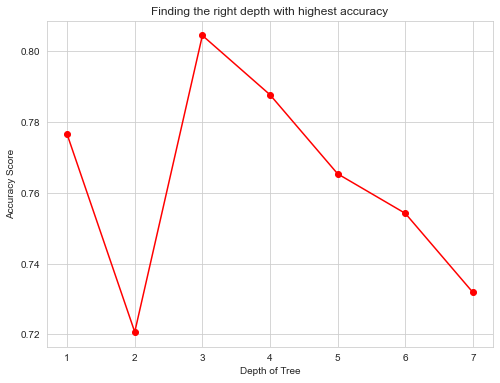

In [662]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="red", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.title("Finding the right depth with highest accuracy")
plt.xticks(range(1,8))
plt.show()

In [663]:
test

Pclass                                          Name  Sex  Age  Fare  \
0         3                              Kelly, Mr. James    0   34     7   
1         3              Wilkes, Mrs. James (Ellen Needs)    1   47     7   
2         2                     Myles, Mr. Thomas Francis    0   62     9   
3         3                              Wirz, Mr. Albert    0   27     8   
4         3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   22    12   
..      ...                                           ...  ...  ...   ...   
413       3                            Spector, Mr. Woolf    0   25     8   
414       1                  Oliva y Ocana, Dona. Fermina    1   39   108   
415       3                  Saether, Mr. Simon Sivertsen    0   38     7   
416       3                           Ware, Mr. Frederick    0   25     8   
417       3                      Peter, Master. Michael J    0   25    22   

     Cabin  Prefix  Family  Q  S  
0        0     0.0       1  1  0  
1        0     2.0       2  0  1  
2        0     0.0       1  1  0  
3        0     0.0       1  0  1  
4        0     2.0       3  0  1  
..     ...     ...     ... .. ..  
413      0     0.0       1  0  1  
414      3     NaN       1  0  0  
415      0     0.0       1  0  1  
416      0     0.0       1  0  1  
417      0     0.0       3  0  0  

[418 rows x 10 columns]

In [664]:
clf_tr = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = 3)
clf_tr.fit(X,Y)
pred_tree = clf_tr.predict(X_TEST)
df_TREE = pd.DataFrame()
df_TREE["PassengerId"] = test["PassengerId"]
df_TREE["Survived"] = pred_tree
df_TREE.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Embarked    891 non-null    int32  
 4   Title       891 non-null    int64  
 5   Age_log     891 non-null    float64
 6   Fare_log    891 non-null    float64
 7   Family_dgt  891 non-null    int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_predict = model.predict(x_test, )
y_predict[:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [ ]:
# train과 test값을 다르게 예측한 데이터 개수
(y_predict != y_test).sum()

35

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

80.44692737430168

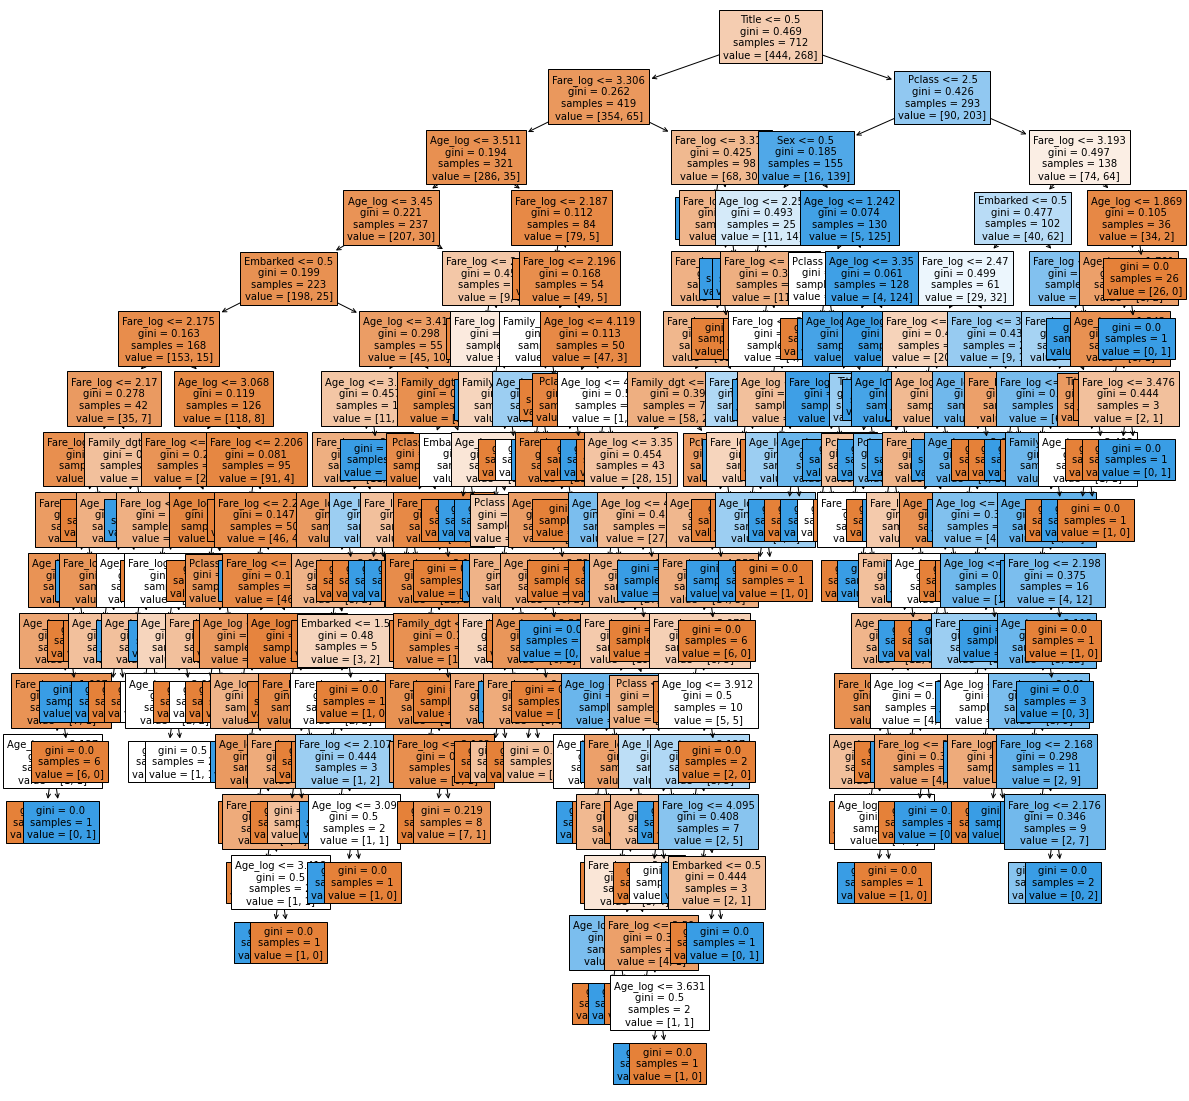

In [ ]:
#라이브러리 불러오기
from sklearn.tree import plot_tree
#트리 알고리즘 시각화하기 (plot_tree(의사결정나무(_알고리즘),의사결정에 사용한 칼럼 지정해주기))
plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names,
                 filled=True, fontsize=10)

In [ ]:
# 중요도 분석
model.feature_importances_

array([0.11019934, 0.0213343 , 0.01750109, 0.32090909, 0.21535418,
       0.29505807, 0.01964392])

<AxesSubplot:>

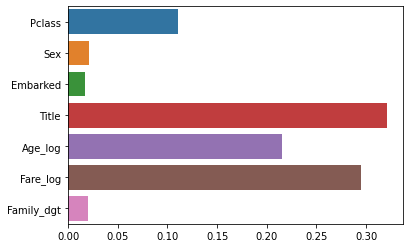

In [ ]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
#score 함수 사용해서 정확도 구하기
model.score(x_test, y_test) * 100

80.44692737430168

In [ ]:
from sklearn.metrics import accuracy_score
for max_depth in range(1,15):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)
    y_predict = model.fit(x_train, y_train).predict(x_test)
    score = accuracy_score(y_test, y_predict)*100
    print(max_depth, score)

1 78.2122905027933
2 75.97765363128491
3 81.56424581005587
4 82.68156424581005
5 82.68156424581005
6 82.12290502793296
7 82.12290502793296
8 81.56424581005587
9 81.00558659217877
10 79.3296089385475
11 80.44692737430168
12 81.00558659217877
13 80.44692737430168
14 78.77094972067039


# Random Forest

In [665]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train,y_train)
yhat = clf_forest.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,yhat))

Accuracy for training data :  0.7821229050279329


In [666]:
clf_for = RandomForestClassifier(random_state=0)
clf_for.fit(X,Y)
y_forest = clf_for.predict(X_TEST)
df_FOREST = pd.DataFrame()
df_FOREST["PassengerId"] = test["PassengerId"]
df_FOREST["Survived"] = y_forest
df_FOREST.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_predict = model.predict(x_test)
y_predict[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [ ]:
# train과 test값을 다르게 예측한 데이터 개수
(y_predict != y_test).sum()

27

In [ ]:
accuracy_score(y_test, y_predict) * 100

84.91620111731844

In [ ]:
# 중요도 분석
model.feature_importances_

array([0.09331092, 0.16018648, 0.03725247, 0.15686866, 0.23120983,
       0.28121687, 0.03995477])

<AxesSubplot:>

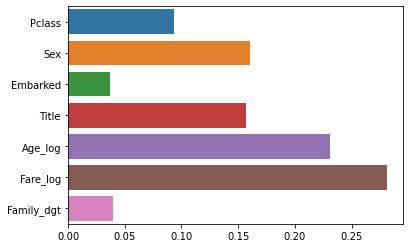

In [ ]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
#score 함수 사용해서 정확도 구하기
model.score(x_test, y_test) * 100

84.91620111731844

In [ ]:
from sklearn.metrics import accuracy_score
for max_depth in range(1,15):
    model = RandomForestClassifier(max_depth = max_depth, random_state = 42)
    y_predict = model.fit(x_train, y_train).predict(x_test)
    score = accuracy_score(y_test, y_predict)*100
    print(max_depth, score)

1 78.2122905027933
2 79.88826815642457
3 81.00558659217877
4 81.56424581005587
5 83.24022346368714
6 83.24022346368714
7 84.35754189944134
8 84.35754189944134
9 84.91620111731844
10 85.47486033519553
11 84.91620111731844
12 84.91620111731844
13 84.91620111731844
14 83.79888268156425


### SVM

In [667]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train,y_train)
yhat = clf_svm.predict(X_test)
clf_SVM = SVC(gamma='auto')
clf_SVM.fit(X,Y)
pred_svm = clf_SVM.predict(X_TEST)
df_SVM = pd.DataFrame()
df_SVM["PassengerId"] = test["PassengerId"]
df_SVM["Survived"] = pred_svm
df_SVM.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### GaussianNB

In [668]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train,y_train)
y_hat = clf_NB.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,y_hat))

Accuracy for training data :  0.7486033519553073


In [669]:
clf_NB = GaussianNB()
clf_NB.fit(X,Y)
pred_NB = clf_NB.predict(X_TEST)
df_NB = pd.DataFrame()
df_NB["PassengerId"] = test["PassengerId"]
df_NB["Survived"] = pred_NB
df_NB.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Logistic Regression

In [670]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression(solver='liblinear', random_state=1)
regr.fit(X_train,y_train)
yhat = regr.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,y_hat))

Accuracy for training data :  0.7486033519553073


In [671]:
reg = LogisticRegression(solver='liblinear', random_state=1)
reg.fit(X,Y)
y_LR = reg.predict(X_TEST)
df_LR = pd.DataFrame()
df_LR["PassengerId"] = test["PassengerId"]
df_LR["Survived"] = y_LR
df_LR.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### SGD

In [672]:
from sklearn.linear_model import SGDClassifier

clf_SGD = SGDClassifier(loss="squared_loss", penalty="l2", max_iter=4500,tol=-1000, random_state=1)
clf_SGD.fit(X_train,y_train)
yhat = clf_SGD.predict(X_test)
print(accuracy_score(y_test,yhat))

0.6312849162011173


In [673]:
clf_SGD = SGDClassifier(loss="squared_loss", penalty="l2", max_iter=4500, tol=-1000, random_state=1)
clf_SGD.fit(X,Y)
y_SGD = clf_SGD.predict(X_TEST)
df_SGD = pd.DataFrame()
df_SGD["PassengerId"] = test2["PassengerId"]
df_SGD["Survived"] = y_SGD
df_SGD.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [674]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),[KNN_accuracy,TREE_accuracy,FOREST_accuracy,SVM_accuracy,NB_accuracy,LR_accuracy,SGD_accuracy],marker='o')
plt.xticks(range(1,8),['KNN','Decision Tree','Random Forest','SVM','Naive Bayes','Log Regression','SGD'],rotation=25)
plt.title('Accuracy of Various Models')
plt.xlabel('Model Names')
plt.ylabel("Accuracy Score")
plt.show()

NameError: name 'KNN_accuracy' is not defined

<Figure size 576x432 with 0 Axes>

### 3.3 GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model =GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_predict = model.predict(x_test)
y_predict[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [ ]:
# train과 test값을 다르게 예측한 데이터 개수
(y_predict != y_test).sum()

34

In [ ]:
accuracy_score(y_test, y_predict) * 100

81.00558659217877

In [ ]:
# 중요도 분석
model.feature_importances_

array([0.15560937, 0.05149866, 0.01951117, 0.4598688 , 0.11347929,
       0.19779162, 0.00224109])

<AxesSubplot:>

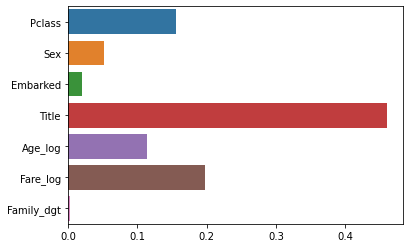

In [ ]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
#score 함수 사용해서 정확도 구하기
model.score(x_test, y_test) * 100

81.00558659217877

In [ ]:
from sklearn.metrics import accuracy_score
for max_depth in range(1,15):
    model = GradientBoostingClassifier(max_depth = max_depth, random_state = 42)
    y_predict = model.fit(x_train, y_train).predict(x_test)
    score = accuracy_score(y_test, y_predict)*100
    print(max_depth, score)

1 79.88826815642457
2 80.44692737430168
3 81.00558659217877
4 84.35754189944134
5 85.47486033519553
6 83.79888268156425
7 83.79888268156425
8 84.35754189944134
9 83.24022346368714
10 84.91620111731844
11 84.35754189944134
12 84.35754189944134
13 82.12290502793296
14 82.68156424581005


### 3.4. lgbm

In [ ]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(x_test, y_test)]
lgbm_wrapper.fit(x_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
                eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(x_test)
pred_proba = lgbm_wrapper.predict_proba(x_test)[:,1]

[1]	valid_0's binary_logloss: 0.632856
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.596038
[3]	valid_0's binary_logloss: 0.565062
[4]	valid_0's binary_logloss: 0.541214
[5]	valid_0's binary_logloss: 0.519645
[6]	valid_0's binary_logloss: 0.501813
[7]	valid_0's binary_logloss: 0.487563
[8]	valid_0's binary_logloss: 0.476094
[9]	valid_0's binary_logloss: 0.465951
[10]	valid_0's binary_logloss: 0.455528
[11]	valid_0's binary_logloss: 0.448247
[12]	valid_0's binary_logloss: 0.443214
[13]	valid_0's binary_logloss: 0.438877
[14]	valid_0's binary_logloss: 0.434338
[15]	valid_0's binary_logloss: 0.429173
[16]	valid_0's binary_logloss: 0.42654
[17]	valid_0's binary_logloss: 0.422435
[18]	valid_0's binary_logloss: 0.42082
[19]	valid_0's binary_logloss: 0.420013
[20]	valid_0's binary_logloss: 0.418663
[21]	valid_0's binary_logloss: 0.416699
[22]	valid_0's binary_logloss: 0.415377
[23]	valid_0's binary_logloss: 0.415908
[24]	valid_0's binary_logloss

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, Pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[92 13]
 [14 60]]
정확도:0.8492, 정밀도:0.8219, 재현율:0.8108, F1:0.8163, AUC:0.9099


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

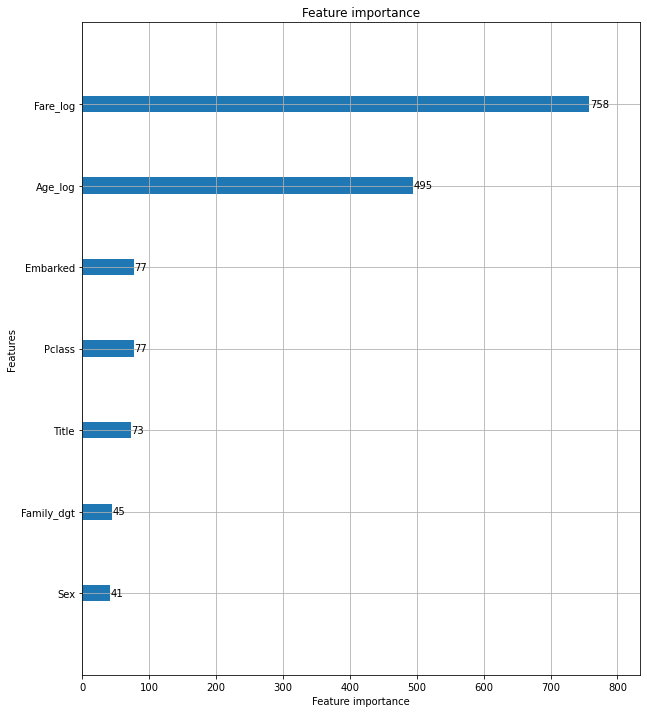

In [ ]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)


### 3.5. Feature Engineering: RandomizedSearchCV 활용

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
                        RandomForestClassifier(random_state=42), 
                        GradientBoostingClassifier(random_state=42)
             ]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [ ]:
max_depth = np.random.randint(2,20,10)

max_features = np.random.uniform(0.3,1.0,10)

In [ ]:
results = []
for estimator in estimators:
    result =[]
    result.append(estimator.__class__.__name__)
    results.append(result)
results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(10, 200, 10)
        
    clf = RandomizedSearchCV(estimator, 
                       param_distributions, 
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5, 
                       verbose=2
                      )

    clf.fit(x_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(x_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
pd.DataFrame(results)

0  \
0      DecisionTreeClassifier   
1      RandomForestClassifier   
2  GradientBoostingClassifier   

                                                   1         2         3  \
0  {'max_features': 0.9911166649301457, 'max_dept...  0.804738  0.815642   
1  {'n_estimators': 64, 'max_features': 0.5572775...  0.824377  0.832402   
2  {'n_estimators': 94, 'max_features': 0.9282436...  0.814577  0.815642   

                                                   4  
0  {'mean_fit_time': [0.0036031246185302735, 0.00...  
1  {'mean_fit_time': [0.12700104713439941, 0.2536...  
2  {'mean_fit_time': [0.07566876411437988, 0.5851...

In [ ]:
# DecisionTree, RandomForestClassifier, GBM 결과
r_search_result = pd.DataFrame(results, 
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])
r_search_result

estimator  \
0      DecisionTreeClassifier   
1      RandomForestClassifier   
2  GradientBoostingClassifier   

                                         best_params  train_score  test_score  \
0  {'max_features': 0.9911166649301457, 'max_dept...     0.804738    0.815642   
1  {'n_estimators': 64, 'max_features': 0.5572775...     0.824377    0.832402   
2  {'n_estimators': 94, 'max_features': 0.9282436...     0.814577    0.815642   

                                           cv_result  
0  {'mean_fit_time': [0.0036031246185302735, 0.00...  
1  {'mean_fit_time': [0.12700104713439941, 0.2536...  
2  {'mean_fit_time': [0.07566876411437988, 0.5851...

### 3.6. Feature Engineering: GridSearchCV 활용 LGBM

In [ ]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32,64],
         'max_depth':[100, 200],
         'min_child_samples':[60,100],
         'subsample':[0.8,1]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric="auc",
          eval_set=[(x_train, y_train),(x_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:,1], average='macro')
print('ROC AUC: {0:.4}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.850326	valid_0's binary_logloss: 0.622841	valid_1's auc: 0.855598	valid_1's binary_logloss: 0.640302
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.8551	valid_0's binary_logloss: 0.591739	valid_1's auc: 0.854311	valid_1's binary_logloss: 0.608426
[3]	valid_0's auc: 0.848839	valid_0's binary_logloss: 0.566593	valid_1's auc: 0.848198	valid_1's binary_logloss: 0.582768
[4]	valid_0's auc: 0.856234	valid_0's binary_logloss: 0.545186	valid_1's auc: 0.858237	valid_1's binary_logloss: 0.560474
[5]	valid_0's auc: 0.857906	valid_0's binary_logloss: 0.5278	valid_1's auc: 0.857979	valid_1's binary_logloss: 0.543029
[6]	valid_0's auc: 0.857348	valid_0's binary_logloss: 0.512514	valid_1's auc: 0.85888	valid_1's binary_logloss: 0.528475
[7]	valid_0's auc: 0.857448	valid_0's binary_logloss: 0.49951	valid_1's auc: 0.859395	valid_1's binary_logloss: 0.516076
[8]	valid_0's auc: 0.857549	valid_0's binary_logloss: 0.488827	valid_1's auc: 0.859395	vali

[108]	valid_0's auc: 0.901048	valid_0's binary_logloss: 0.369139	valid_1's auc: 0.887645	valid_1's binary_logloss: 0.411116
[109]	valid_0's auc: 0.901199	valid_0's binary_logloss: 0.368925	valid_1's auc: 0.887773	valid_1's binary_logloss: 0.411073
[110]	valid_0's auc: 0.901317	valid_0's binary_logloss: 0.368394	valid_1's auc: 0.886873	valid_1's binary_logloss: 0.410978
[111]	valid_0's auc: 0.901737	valid_0's binary_logloss: 0.367634	valid_1's auc: 0.888031	valid_1's binary_logloss: 0.41015
[112]	valid_0's auc: 0.901914	valid_0's binary_logloss: 0.367451	valid_1's auc: 0.887773	valid_1's binary_logloss: 0.410967
[113]	valid_0's auc: 0.902225	valid_0's binary_logloss: 0.367293	valid_1's auc: 0.886873	valid_1's binary_logloss: 0.41219
[114]	valid_0's auc: 0.902485	valid_0's binary_logloss: 0.366867	valid_1's auc: 0.886358	valid_1's binary_logloss: 0.411617
[115]	valid_0's auc: 0.902863	valid_0's binary_logloss: 0.36677	valid_1's auc: 0.885199	valid_1's binary_logloss: 0.412775
[116]	valid

[55]	valid_0's auc: 0.886429	valid_0's binary_logloss: 0.390959	valid_1's auc: 0.866731	valid_1's binary_logloss: 0.444677
[56]	valid_0's auc: 0.886698	valid_0's binary_logloss: 0.390423	valid_1's auc: 0.866474	valid_1's binary_logloss: 0.445867
[57]	valid_0's auc: 0.887076	valid_0's binary_logloss: 0.389914	valid_1's auc: 0.867117	valid_1's binary_logloss: 0.445462
[58]	valid_0's auc: 0.887791	valid_0's binary_logloss: 0.389093	valid_1's auc: 0.867503	valid_1's binary_logloss: 0.444954
[59]	valid_0's auc: 0.888144	valid_0's binary_logloss: 0.388496	valid_1's auc: 0.867375	valid_1's binary_logloss: 0.444746
[60]	valid_0's auc: 0.888345	valid_0's binary_logloss: 0.388241	valid_1's auc: 0.865573	valid_1's binary_logloss: 0.44687
[61]	valid_0's auc: 0.888312	valid_0's binary_logloss: 0.387779	valid_1's auc: 0.866474	valid_1's binary_logloss: 0.446567
[62]	valid_0's auc: 0.888379	valid_0's binary_logloss: 0.387542	valid_1's auc: 0.866088	valid_1's binary_logloss: 0.446148
[63]	valid_0's au

[43]	valid_0's auc: 0.855116	valid_0's binary_logloss: 0.439706	valid_1's auc: 0.874517	valid_1's binary_logloss: 0.44124
[44]	valid_0's auc: 0.854931	valid_0's binary_logloss: 0.439101	valid_1's auc: 0.872458	valid_1's binary_logloss: 0.440811
Early stopping, best iteration is:
[14]	valid_0's auc: 0.84857	valid_0's binary_logloss: 0.501301	valid_1's auc: 0.880245	valid_1's binary_logloss: 0.499654
[1]	valid_0's auc: 0.795726	valid_0's binary_logloss: 0.63234	valid_1's auc: 0.823037	valid_1's binary_logloss: 0.648034
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.795726	valid_0's binary_logloss: 0.608315	valid_1's auc: 0.823037	valid_1's binary_logloss: 0.621358
[3]	valid_0's auc: 0.81055	valid_0's binary_logloss: 0.588003	valid_1's auc: 0.837709	valid_1's binary_logloss: 0.598479
[4]	valid_0's auc: 0.81087	valid_0's binary_logloss: 0.571889	valid_1's auc: 0.839768	valid_1's binary_logloss: 0.580392
[5]	valid_0's auc: 0.81087	valid_0's binary_logloss:

[62]	valid_0's auc: 0.893648	valid_0's binary_logloss: 0.384343	valid_1's auc: 0.899807	valid_1's binary_logloss: 0.412024
[63]	valid_0's auc: 0.893463	valid_0's binary_logloss: 0.384186	valid_1's auc: 0.89852	valid_1's binary_logloss: 0.411753
[64]	valid_0's auc: 0.893951	valid_0's binary_logloss: 0.383459	valid_1's auc: 0.899678	valid_1's binary_logloss: 0.411117
[65]	valid_0's auc: 0.894329	valid_0's binary_logloss: 0.382885	valid_1's auc: 0.901609	valid_1's binary_logloss: 0.41089
[66]	valid_0's auc: 0.894917	valid_0's binary_logloss: 0.382127	valid_1's auc: 0.901094	valid_1's binary_logloss: 0.410321
[67]	valid_0's auc: 0.895648	valid_0's binary_logloss: 0.381244	valid_1's auc: 0.901737	valid_1's binary_logloss: 0.409268
[68]	valid_0's auc: 0.896464	valid_0's binary_logloss: 0.381066	valid_1's auc: 0.901737	valid_1's binary_logloss: 0.410054
[69]	valid_0's auc: 0.896346	valid_0's binary_logloss: 0.380941	valid_1's auc: 0.90148	valid_1's binary_logloss: 0.409868
[70]	valid_0's auc:

[52]	valid_0's auc: 0.888631	valid_0's binary_logloss: 0.394951	valid_1's auc: 0.881017	valid_1's binary_logloss: 0.426475
[53]	valid_0's auc: 0.888824	valid_0's binary_logloss: 0.394288	valid_1's auc: 0.879858	valid_1's binary_logloss: 0.426371
[54]	valid_0's auc: 0.889102	valid_0's binary_logloss: 0.39408	valid_1's auc: 0.880502	valid_1's binary_logloss: 0.426152
[55]	valid_0's auc: 0.889245	valid_0's binary_logloss: 0.393365	valid_1's auc: 0.880888	valid_1's binary_logloss: 0.426101
[56]	valid_0's auc: 0.889623	valid_0's binary_logloss: 0.392703	valid_1's auc: 0.88121	valid_1's binary_logloss: 0.425368
[57]	valid_0's auc: 0.889837	valid_0's binary_logloss: 0.391784	valid_1's auc: 0.882175	valid_1's binary_logloss: 0.424383
[58]	valid_0's auc: 0.890123	valid_0's binary_logloss: 0.391222	valid_1's auc: 0.883076	valid_1's binary_logloss: 0.424437
[59]	valid_0's auc: 0.890262	valid_0's binary_logloss: 0.390539	valid_1's auc: 0.883977	valid_1's binary_logloss: 0.423087
[60]	valid_0's auc

[2]	valid_0's auc: 0.797911	valid_0's binary_logloss: 0.608003	valid_1's auc: 0.824067	valid_1's binary_logloss: 0.620972
[3]	valid_0's auc: 0.797911	valid_0's binary_logloss: 0.58843	valid_1's auc: 0.824067	valid_1's binary_logloss: 0.599155
[4]	valid_0's auc: 0.797911	valid_0's binary_logloss: 0.572476	valid_1's auc: 0.824067	valid_1's binary_logloss: 0.581222
[5]	valid_0's auc: 0.812118	valid_0's binary_logloss: 0.55825	valid_1's auc: 0.847812	valid_1's binary_logloss: 0.564879
[6]	valid_0's auc: 0.812025	valid_0's binary_logloss: 0.547344	valid_1's auc: 0.847812	valid_1's binary_logloss: 0.552334
[7]	valid_0's auc: 0.812025	valid_0's binary_logloss: 0.537472	valid_1's auc: 0.847812	valid_1's binary_logloss: 0.540709
[8]	valid_0's auc: 0.812025	valid_0's binary_logloss: 0.52997	valid_1's auc: 0.847812	valid_1's binary_logloss: 0.531832
[9]	valid_0's auc: 0.812025	valid_0's binary_logloss: 0.523071	valid_1's auc: 0.847812	valid_1's binary_logloss: 0.52345
[10]	valid_0's auc: 0.851116

[74]	training's auc: 0.929092	training's binary_logloss: 0.332102	valid_1's auc: 0.89897	valid_1's binary_logloss: 0.399404
[75]	training's auc: 0.929487	training's binary_logloss: 0.33133	valid_1's auc: 0.898713	valid_1's binary_logloss: 0.398974
[76]	training's auc: 0.930142	training's binary_logloss: 0.330662	valid_1's auc: 0.900129	valid_1's binary_logloss: 0.398266
[77]	training's auc: 0.930285	training's binary_logloss: 0.329898	valid_1's auc: 0.900644	valid_1's binary_logloss: 0.397173
[78]	training's auc: 0.930764	training's binary_logloss: 0.329105	valid_1's auc: 0.900129	valid_1's binary_logloss: 0.397635
[79]	training's auc: 0.930882	training's binary_logloss: 0.328362	valid_1's auc: 0.900129	valid_1's binary_logloss: 0.399035
[80]	training's auc: 0.931714	training's binary_logloss: 0.327571	valid_1's auc: 0.899743	valid_1's binary_logloss: 0.399098
[81]	training's auc: 0.932042	training's binary_logloss: 0.32701	valid_1's auc: 0.899356	valid_1's binary_logloss: 0.399134
[82